# Preliminary Exploratory Data Analysis

In [101]:
import pandas as pd

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
ipl_df = pd.read_csv('/content/drive/MyDrive/ENG group project/deliveries.csv')

In [104]:
ipl_df.tail()

match_id  inning         batting_team    bowling_team  over  ball  \
243812   1370353       2  Chennai Super Kings  Gujarat Titans    14     2   
243813   1370353       2  Chennai Super Kings  Gujarat Titans    14     3   
243814   1370353       2  Chennai Super Kings  Gujarat Titans    14     4   
243815   1370353       2  Chennai Super Kings  Gujarat Titans    14     5   
243816   1370353       2  Chennai Super Kings  Gujarat Titans    14     6   

           batter     bowler non_striker  batsman_runs  extra_runs  \
243812     S Dube  MM Sharma   RA Jadeja             1           0   
243813  RA Jadeja  MM Sharma      S Dube             1           0   
243814     S Dube  MM Sharma   RA Jadeja             1           0   
243815  RA Jadeja  MM Sharma      S Dube             6           0   
243816  RA Jadeja  MM Sharma      S Dube             4           0   

        total_runs extras_type  is_wicket player_dismissed dismissal_kind  \
243812           1         NaN          0              NaN            NaN   
243813           1         NaN          0              NaN            NaN   
243814           1         NaN          0              NaN            NaN   
243815           6         NaN          0              NaN            NaN   
243816           4         NaN          0              NaN            NaN   

       fielder  
243812     NaN  
243813     NaN  
243814     NaN  
243815     NaN  
243816     NaN

In [105]:
# Check for missing values
print(ipl_df.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         230758
is_wicket                0
player_dismissed    231750
dismissal_kind      231750
fielder             235154
dtype: int64


In [106]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          243817 non-null  int64 
 1   inning            243817 non-null  int64 
 2   batting_team      243817 non-null  object
 3   bowling_team      243817 non-null  object
 4   over              243817 non-null  int64 
 5   ball              243817 non-null  int64 
 6   batter            243817 non-null  object
 7   bowler            243817 non-null  object
 8   non_striker       243817 non-null  object
 9   batsman_runs      243817 non-null  int64 
 10  extra_runs        243817 non-null  int64 
 11  total_runs        243817 non-null  int64 
 12  extras_type       13059 non-null   object
 13  is_wicket         243817 non-null  int64 
 14  player_dismissed  12067 non-null   object
 15  dismissal_kind    12067 non-null   object
 16  fielder           8663 non-null    obj

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

The Top 10 Batsmen in the Tournament are:
              batter  Runs
597         V Kohli  7273
488        S Dhawan  6617
138       DA Warner  6399
455       RG Sharma  6213
519        SK Raina  5536
27   AB de Villiers  5181
357        MS Dhoni  5082
116        CH Gayle  4997
477      RV Uthappa  4954
269      KD Karthik  4517


<ipython-input-108-f51c28e6c7dc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batsmen, y='batter', x='Runs', palette=colors)


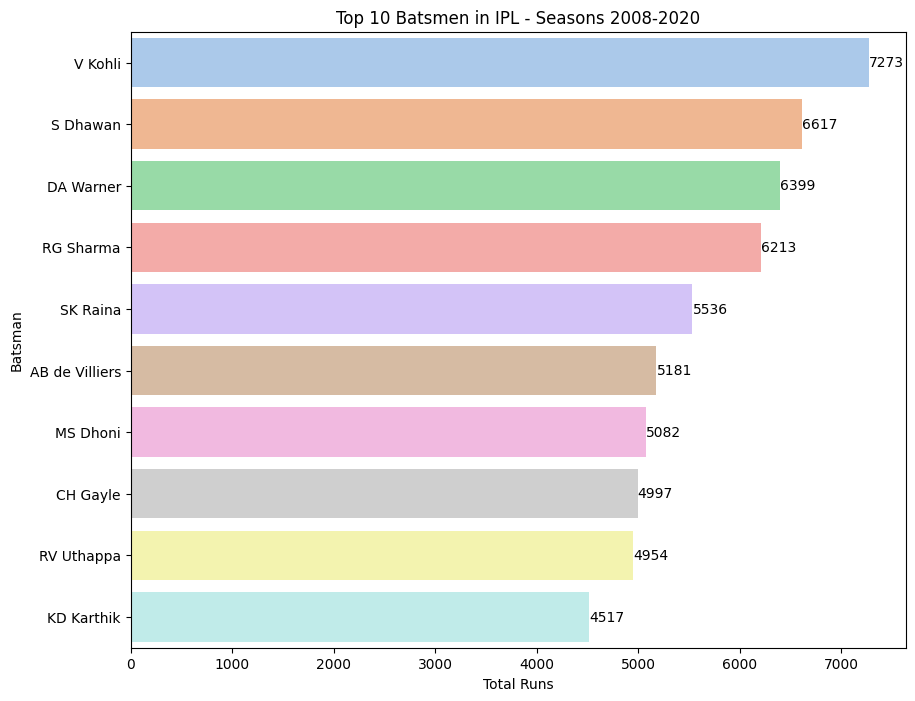

In [108]:
# Group by batsman and calculate total runs
batting_tot = ipl_df.groupby('batter')['batsman_runs'].sum().reset_index(name='Runs')

# Sort the ipl_dfframe by Runs in descending order
batting_sorted = batting_tot.sort_values(by='Runs', ascending=False)

# Select top 10 batsmen
top_batsmen = batting_sorted.head(10)

# Print top 10 batsmen
print('The Top 10 Batsmen in the Tournament are:\n', top_batsmen)

# Plotting

# Create a custom color palette
colors = sns.color_palette('pastel')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=top_batsmen, y='batter', x='Runs', palette=colors)

# Add annotations
for index, value in enumerate(top_batsmen['Runs']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

# Customize labels and title
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen in IPL - Seasons 2008-2020')

# Show the plot
plt.show()

In [109]:
data=pd.read_csv('/content/drive/MyDrive/ENG group project/deliveries.csv')

In [110]:
data.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0           1     legbyes          0              NaN            NaN     NaN  
1           0         NaN          0              NaN            NaN     NaN  
2           1       wides          0              NaN            NaN     NaN  
3           0         NaN          0              NaN            NaN     NaN  
4           0         NaN          0              NaN            NaN     NaN

In [111]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [112]:
import pandas as pd

# Assuming your DataFrame is named 'ipl_df'

# Group by batsman and calculate total runs and balls faced
batsman_stats = ipl_df.groupby('batter').agg({
    'batsman_runs': 'sum',           # Total runs scored by each batsman
    'ball': 'count'                  # Total balls faced by each batsman
}).reset_index()

# Calculate strike rate (runs per ball * 100)
batsman_stats['Strike Rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100

# Rename columns for clarity
batsman_stats.rename(columns={'batter': 'Batsman', 'batsman_runs': 'Runs Scored'}, inplace=True)

# Sort the DataFrame by runs scored in descending order
batsman_stats = batsman_stats.sort_values(by='Runs Scored', ascending=False)

# Reset index
batsman_stats.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(batsman_stats)


                     Batsman  Runs Scored  ball  Strike Rate
0                    V Kohli         7273  5739   126.729395
1                   S Dhawan         6617  5358   123.497574
2                  DA Warner         6399  4719   135.600763
3                  RG Sharma         6213  4890   127.055215
4                   SK Raina         5536  4177   132.535312
5             AB de Villiers         5181  3487   148.580442
6                   MS Dhoni         5082  3865   131.487710
7                   CH Gayle         4997  3516   142.121729
8                 RV Uthappa         4954  3927   126.152279
9                 KD Karthik         4517  3492   129.352806
10                 AM Rahane         4400  3658   120.284308
11                 AT Rayudu         4348  3490   124.584527
12                 G Gambhir         4217  3524   119.665153
13                  KL Rahul         4169  3180   131.100629
14              F du Plessis         4133  3159   130.832542
15                 SV Sa

In [113]:
import pandas as pd
import networkx as nx

# Assuming your DataFrame is named 'ipl_df'

# Group by batsman and calculate total runs and balls faced
batsman_stats = ipl_df.groupby('batter').agg({
    'batsman_runs': 'sum',           # Total runs scored by each batsman
    'ball': 'count'                  # Total balls faced by each batsman
}).reset_index()

# Calculate strike rate (runs per ball * 100)
batsman_stats['Strike Rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100

# Create a directed graph
G = nx.DiGraph()

# Add edges representing interactions between players (e.g., who scored off whose bowling)
for _, row in ipl_df.iterrows():
    G.add_edge(row['bowler'], row['batter'], weight=row['batsman_runs'])

# Run PageRank algorithm
pagerank = nx.pagerank(G)

# Add strike rate and runs scored to the pagerank dictionary
# Add strike rate and runs scored to the pagerank dictionary
for player, score in pagerank.items():
    batsman_runs = batsman_stats.loc[batsman_stats['batter'] == player, 'batsman_runs']
    strike_rate = batsman_stats.loc[batsman_stats['batter'] == player, 'Strike Rate']
    if not batsman_runs.empty and not strike_rate.empty:
        pagerank[player] = {'PageRank': score, 'Runs Scored': batsman_runs.iloc[0], 'Strike Rate': strike_rate.iloc[0]}
    else:
        # If player data not found, set default values
        pagerank[player] = {'PageRank': score, 'Runs Scored': 0, 'Strike Rate': 0}

# Convert pagerank dictionary to DataFrame
pagerank_df = pd.DataFrame.from_dict(pagerank, orient='index')

# Sort the DataFrame by PageRank, Runs Scored, and Strike Rate
pagerank_df.sort_values(by=['PageRank', 'Runs Scored', 'Strike Rate'], ascending=False, inplace=True)

# Reset index
pagerank_df.reset_index(inplace=True)
pagerank_df.rename(columns={'index': 'Batsman'}, inplace=True)

# Print the DataFrame
print(pagerank_df[:20])


           Batsman  PageRank  Runs Scored  Strike Rate
0          RR Pant  0.011197         2851   142.550000
1       RV Uthappa  0.010178         4954   126.152279
2         CH Gayle  0.009606         4997   142.121729
3         S Dhawan  0.009400         6617   123.497574
4         SK Raina  0.008861         5536   132.535312
5        DA Warner  0.008495         6399   135.600763
6        G Gambhir  0.008347         4217   119.665153
7          NV Ojha  0.008339         1554   114.264706
8        SR Watson  0.007954         3880   134.163209
9        RG Sharma  0.007812         6213   127.055215
10         V Kohli  0.007707         7273   126.729395
11        MS Dhoni  0.007544         5082   131.487710
12       AM Rahane  0.007165         4400   120.284308
13       AT Rayudu  0.007032         4348   124.584527
14       Q de Kock  0.006591         2910   131.317690
15  AB de Villiers  0.006390         5181   148.580442
16      KD Karthik  0.006215         4517   129.352806
17       Y

In [114]:
# Sort ipl_df by 'batter' and 'match_id' to get the most recent team for each batsman
ipl_df_sorted = ipl_df.sort_values(by=['batter', 'match_id'], ascending=[True, False])

# Merge the pagerank_df with ipl_df_sorted to get the team information
final_df = pd.merge(pagerank_df, ipl_df_sorted[['batter', 'batting_team']].drop_duplicates(subset=['batter'], keep='first'), left_on='Batsman', right_on='batter', how='left')

# Drop the redundant 'batter' column
final_df.drop(columns='batter', inplace=True)

# Reset index
final_df.reset_index(drop=True, inplace=True)

# Print the final DataFrame containing the top 20 batsmen with their most recent team

import pandas as pd

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print the final DataFrame containing the top 20 batsmen with their most recent team
print(final_df[:20])


           Batsman  PageRank  Runs Scored  Strike Rate  \
0          RR Pant  0.011197         2851   142.550000   
1       RV Uthappa  0.010178         4954   126.152279   
2         CH Gayle  0.009606         4997   142.121729   
3         S Dhawan  0.009400         6617   123.497574   
4         SK Raina  0.008861         5536   132.535312   
5        DA Warner  0.008495         6399   135.600763   
6        G Gambhir  0.008347         4217   119.665153   
7          NV Ojha  0.008339         1554   114.264706   
8        SR Watson  0.007954         3880   134.163209   
9        RG Sharma  0.007812         6213   127.055215   
10         V Kohli  0.007707         7273   126.729395   
11        MS Dhoni  0.007544         5082   131.487710   
12       AM Rahane  0.007165         4400   120.284308   
13       AT Rayudu  0.007032         4348   124.584527   
14       Q de Kock  0.006591         2910   131.317690   
15  AB de Villiers  0.006390         5181   148.580442   
16      KD Kar

In [115]:
# Display unique teams in the DataFrame
unique_teams = final_df['batting_team'].unique()
print("Unique Teams:")
for team in unique_teams:
    print(team)


Unique Teams:
Delhi Capitals
Chennai Super Kings
Punjab Kings
Delhi Daredevils
Mumbai Indians
Royal Challengers Bangalore
Lucknow Super Giants
Sunrisers Hyderabad
Kolkata Knight Riders
Kings XI Punjab
Rajasthan Royals
Gujarat Titans
Pune Warriors
Gujarat Lions
Rising Pune Supergiants
Rising Pune Supergiant
Kochi Tuskers Kerala
Deccan Chargers
nan


# Checking the team requirements

## Getting number of available spots and team compositions

In [116]:
import pandas as pd
ipl_2024 = pd.read_csv('/content/drive/MyDrive/ENG group project/IPL Teams 2024.csv')

In [117]:
ipl_2024.head()

Player        Role     Auction Price       Nation  \
0  MS Dhoni (wk)(c)  WK-Batsman      INR 12 Cr(R)        India   
1   Ruturaj Gaikwad     Batsman       INR 6 Cr(R)        India   
2      Devon Conway     Batsman   INR 1 crores(R)  New Zealand   
3     Deepak Chahar      Bowler  INR 14 crores(R)        India   
4  Tushar Deshpande      Bowler   INR 20 Lakhs(R)        India   

                  Team  
0  Chennai Super Kings  
1  Chennai Super Kings  
2  Chennai Super Kings  
3  Chennai Super Kings  
4  Chennai Super Kings

In [118]:
ipl_2024.columns

Index(['Player', 'Role', 'Auction Price', 'Nation', 'Team'], dtype='object')

In [119]:
ipl_2024.Role.unique()

array(['WK-Batsman', 'Batsman', 'Bowler', 'All-rounder', 'WT-Batsman',
       'Bowlers', 'Allrounder', 'Batman'], dtype=object)

In [120]:
ipl_2024[ipl_2024['Role']=='WT-Batsman']

Player        Role    Auction Price        Nation            Team
25    Rishabh Pant  WT-Batsman              TBA         India  Delhi Capitals
26  Abhishek Porel  WT-Batsman  INR 20 Lakhs(R)         India  Delhi Capitals
42  Tristan Stubbs  WT-Batsman      INR 50 Lakh  South Africa  Delhi Capitals
43      Ricky Bhui  WT-Batsman      INR 20 Lakh         India  Delhi Capitals
44  Kumar Kushagra  WT-Batsman   INR 7.20 Crore         India  Delhi Capitals
48       Shai Hope  WT-Batsman      INR 75 Lakh   West Indies  Delhi Capitals

In [121]:
ipl_2024_sold = pd.read_csv('/content/drive/MyDrive/ENG group project/IPL Players Sold 2024.csv')

In [122]:
ipl_2024_sold.head()

PLAYER OverseasIndian         TYPE     PRICE PAID  \
0     Daryl Mitchell       Overseas  All-Rounder  ₹14,00,00,000   
1       Sameer Rizvi         Indian       Batter   ₹8,40,00,000   
2     Shardul Thakur         Indian  All-Rounder   ₹4,00,00,000   
3  Mustafizur Rahman       Overseas       Bowler   ₹2,00,00,000   
4    Rachin Ravindra       Overseas  All-Rounder   ₹1,80,00,000   

                  Team  
0  Chennai Super Kings  
1  Chennai Super Kings  
2  Chennai Super Kings  
3  Chennai Super Kings  
4  Chennai Super Kings

In [123]:
ipl_2024_sold[ipl_2024_sold['PLAYER'].str.contains('Bharat', case=False)]


PLAYER OverseasIndian           TYPE  PRICE PAID  \
28  K.S. Bharat         Indian  Wicket-Keeper  ₹50,00,000   

                     Team  
28  Kolkata Knight Riders

In [124]:
ipl_2024_sold.columns

Index(['PLAYER', 'OverseasIndian', 'TYPE', 'PRICE PAID', 'Team'], dtype='object')

In [125]:
import pandas as pd

# Remove unnecessary information from player names
ipl_2024['Player'] = ipl_2024['Player'].str.split('(').str[0].str.strip()

# Clean up roles
role_mapping = {
    'WK-Batsman': 'Wicket-Keeper',
    'WT-Batsman': 'Wicket-Keeper',
    'All-rounder': 'All-Rounder',
    'Allrounder': 'All-Rounder',
    'Batman': 'Batsman',
    'Bowlers': 'Bowler'
}
ipl_2024['Role'] = ipl_2024['Role'].map(role_mapping).fillna(ipl_2024['Role'])

# Group players by team while retaining roles
grouped_players = ipl_2024.groupby('Team')[['Player', 'Role']].apply(lambda x: list(zip(x['Player'], x['Role'])))

# Print grouped players
for team, players_list in grouped_players.items():
    print(f'Team: {team}')
    print('Players:')
    for player, role in players_list:
        print(f'Player: {player}, Role: {role}')
    print()


Team: Chennai Super Kings
Players:
Player: MS Dhoni, Role: Wicket-Keeper
Player: Ruturaj Gaikwad, Role: Batsman
Player: Devon Conway, Role: Batsman
Player: Deepak Chahar, Role: Bowler
Player: Tushar Deshpande, Role: Bowler
Player: Maheesh Theekshana, Role: Bowler
Player: Simranjeet Singh, Role: Bowler
Player: Matheesha Pathirana, Role: Bowler
Player: Prashant Solanki, Role: Bowler
Player: Mitchell Santner, Role: Bowler
Player: Rajvardhan Hangargekar, Role: Bowler
Player: Ravindra Jadeja, Role: All-Rounder
Player: Moeen Ali, Role: All-Rounder
Player: Shivam Dube, Role: All-Rounder
Player: Ajinkya Rahane, Role: Batsman
Player: Nishant Sindhu, Role: All-Rounder
Player: Shaik Rasheed, Role: Batsman
Player: Ajay Mandal, Role: Bowler
Player: Mukesh Choudhary, Role: Bowler
Player: Rachin Ravindra, Role: All-Rounder
Player: Shardul Thakur, Role: All-Rounder
Player: Daryl Mitchell, Role: All-Rounder
Player: Sameer Rizvi, Role: Batsman
Player: Mustafizur Rahman, Role: Bowler
Player: Avanish Rao 

In [126]:
import re

# Preprocess player names in both datasets
def preprocess_player_name(player_name):
    # Remove special characters like '.', '-', and ';'
    player_name = re.sub(r'[.-;]', '', player_name)
    # Convert to lowercase
    player_name = player_name.lower()
    return player_name

# Apply preprocessing to both datasets
ipl_2024['Player'] = ipl_2024['Player'].apply(preprocess_player_name)
ipl_2024_sold['PLAYER'] = ipl_2024_sold['PLAYER'].apply(preprocess_player_name)

# Remove the players present in ipl_2024_sold DataFrame from ipl_2024 DataFrame
players_to_remove = ipl_2024_sold['PLAYER'].unique()
removed_players = ipl_2024[ipl_2024['Player'].isin(players_to_remove)]
ipl_2024 = ipl_2024[~ipl_2024['Player'].isin(players_to_remove)]

# Group players by team while retaining roles
grouped_players = ipl_2024.groupby('Team')[['Player', 'Role', 'Nation']].apply(lambda x: list(zip(x['Player'], x['Role'], x['Nation'])))

# Print removed players
print("Succesfully Removed Sold Players Players.")
'''for player in removed_players['Player']:
    print(player)'''
#print("------------------------------------------------- \n")

# Calculate the number of overseas and Indian players for each team after removal
overseas_counts = {}
indian_counts = {}
batsmen_counts = {}
bowlers_counts = {}
wicketkeepers_counts = {}

# Iterate through grouped players and count
print("\nPlayers of Each Team with Counts:")
for team, players_list in grouped_players.items():
    num_overseas = sum(1 for _, _, nation in players_list if nation != 'India')
    num_indian = sum(1 for _, _, nation in players_list if nation == 'India')
    overseas_counts[team] = num_overseas
    indian_counts[team] = num_indian

    num_batsmen = sum(1 for _, role, _ in players_list if role == 'Batsman')
    num_bowlers = sum(1 for _, role, _ in players_list if role == 'Bowler')
    num_wicketkeepers = sum(1 for _, role, _ in players_list if role == 'Wicket-Keeper')
    num_all_rounder= sum(1 for _, role, _ in players_list if role == 'All-Rounder')
    batsmen_counts[team] = num_batsmen
    bowlers_counts[team] = num_bowlers
    wicketkeepers_counts[team] = num_wicketkeepers

    print("****************************************************** \n")

    # Print team name
    print(f"\nTeam: {team}")

    # Print players and their roles
    print("Players:")
    for player, role, nation in players_list:
        print(f"Player: {player}, Role: {role}, Nation: {nation}")

    # Print team name
    print(f"\nTeam: {team}")
    # Print counts
    print(f" \nTeam Composition:")
    print(f"Number of Overseas Players: {num_overseas}")
    print(f"Number of Indian Players: {num_indian} ")

    print(f" \nComposition of Individual Departments:")
    print(f"Number of Batsmen: {num_batsmen}")
    print(f"Number of Bowlers: {num_bowlers}")
    print(f"Number of Wicket-Keepers: {num_wicketkeepers}")
    print(f"Number of All-Rounders: {num_all_rounder} \n")

    # Print remaining requirements
    total_players = num_overseas + num_indian
    remaining_players = 25 - total_players
    remaining_overseas = 8 - num_overseas
    print(f"Remaining Requirements:")
    print(f"Total Spots Available: {remaining_players}")
    print(f"Overseas Player Spots Available: {remaining_overseas}")


Succesfully Removed Sold Players Players.

Players of Each Team with Counts:
****************************************************** 


Team: Chennai Super Kings
Players:
Player: ms dhoni, Role: Wicket-Keeper, Nation: India
Player: ruturaj gaikwad, Role: Batsman, Nation: India
Player: devon conway, Role: Batsman, Nation: New Zealand
Player: deepak chahar, Role: Bowler, Nation: India
Player: tushar deshpande, Role: Bowler, Nation: India
Player: maheesh theekshana, Role: Bowler, Nation: Sri Lanka
Player: simranjeet singh, Role: Bowler, Nation: India
Player: matheesha pathirana, Role: Bowler, Nation: Sri Lanka
Player: prashant solanki, Role: Bowler, Nation: India
Player: mitchell santner, Role: Bowler, Nation: New Zealand
Player: rajvardhan hangargekar, Role: Bowler, Nation: India
Player: ravindra jadeja, Role: All-Rounder, Nation: India
Player: moeen ali, Role: All-Rounder, Nation: England
Player: shivam dube, Role: All-Rounder, Nation: India
Player: ajinkya rahane, Role: Batsman, Nation:

## Indepth team requirements

Result types : 'wickets', 'runs', 'no result'

LOSING TEAM

1. Wickets:
-> result_margin : won by how many wickets pending

* How many runs lesser than average did they score? - to make it easier to chase target (Find average) - BATTING(cant score) and BOWLING(if negative average, problem with bowling)
* How many wickets did they still have to take (Find average) - BOWLING issue


2. runs
-> result_margin : won by how many runs

* How many runs did they still have to chase (Find average) - BATTING
* How many runs above average was conceeded (Find average) - BOWLING (average is positive - bowlers are conceeding too much) , Batting(average is negative - batsman not able to score)

##############################

Batting issues:
* +ve avg (wickets): avg venue runs - target runs
* avg (runs): runs to chase
* -ve avg (runs): target - avg venue runs

Bowling issues:
* -ve avg (wickets): avg venue runs - target runs
* avg (wickets) : wickets still have to take
* +ve avg (runs): target - avg venue runs


### Basic EDA

In [127]:
import pandas as pd
matches=pd.read_csv('/content/drive/MyDrive/ENG group project/matches.csv')
matches.tail()

id season       city        date   match_type player_of_match  \
1019  1359544   2023  Bengaluru  2023-05-21       League    Shubman Gill   
1020  1370350   2023    Chennai  2023-05-23  Qualifier 1      RD Gaikwad   
1021  1370351   2023    Chennai  2023-05-24   Eliminator   Akash Madhwal   
1022  1370352   2023  Ahmedabad  2023-05-26  Qualifier 2    Shubman Gill   
1023  1370353   2023  Ahmedabad  2023-05-29        Final       DP Conway   

                                         venue                        team1  \
1019          M Chinnaswamy Stadium, Bengaluru  Royal Challengers Bangalore   
1020  MA Chidambaram Stadium, Chepauk, Chennai          Chennai Super Kings   
1021  MA Chidambaram Stadium, Chepauk, Chennai               Mumbai Indians   
1022          Narendra Modi Stadium, Ahmedabad               Gujarat Titans   
1023          Narendra Modi Stadium, Ahmedabad               Gujarat Titans   

                     team2          toss_winner toss_decision  \
1019        Gujarat Titans       Gujarat Titans         field   
1020        Gujarat Titans       Gujarat Titans         field   
1021  Lucknow Super Giants       Mumbai Indians           bat   
1022        Mumbai Indians       Mumbai Indians         field   
1023   Chennai Super Kings  Chennai Super Kings         field   

                   winner   result  result_margin  target_runs  target_overs  \
1019       Gujarat Titans  wickets            6.0        198.0          20.0   
1020  Chennai Super Kings     runs           15.0        173.0          20.0   
1021       Mumbai Indians     runs           81.0        183.0          20.0   
1022       Gujarat Titans     runs           62.0        234.0          20.0   
1023  Chennai Super Kings  wickets            5.0        171.0          15.0   

     super_over method       umpire1      umpire2  
1019          N    NaN   Nitin Menon    VK Sharma  
1020          N    NaN  AK Chaudhary  CB Gaffaney  
1021          N    NaN  BNJ Oxenford    VK Sharma  
1022          N    NaN   Nitin Menon    RJ Tucker  
1023          N    D/L   Nitin Menon    RJ Tucker

In [128]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [129]:
matches[matches['season']=='2023']

id season        city        date   match_type  player_of_match  \
950   1359475   2023   Ahmedabad  2023-03-31       League      Rashid Khan   
951   1359476   2023  Chandigarh  2023-04-01       League   Arshdeep Singh   
952   1359477   2023     Lucknow  2023-04-01       League          MA Wood   
953   1359478   2023   Hyderabad  2023-04-02       League       JC Buttler   
954   1359479   2023   Bengaluru  2023-04-02       League     F du Plessis   
955   1359480   2023     Chennai  2023-04-03       League           MM Ali   
956   1359481   2023       Delhi  2023-04-04       League  B Sai Sudharsan   
957   1359482   2023    Guwahati  2023-04-05       League         NT Ellis   
958   1359483   2023     Kolkata  2023-04-06       League        SN Thakur   
959   1359484   2023     Lucknow  2023-04-07       League        KH Pandya   
960   1359485   2023    Guwahati  2023-04-08       League      YBK Jaiswal   
961   1359486   2023      Mumbai  2023-04-08       League        RA Jadeja   
962   1359487   2023   Ahmedabad  2023-04-09       League         RK Singh   
963   1359488   2023   Hyderabad  2023-04-09       League         S Dhawan   
964   1359489   2023   Bengaluru  2023-04-10       League         N Pooran   
965   1359490   2023       Delhi  2023-04-11       League        RG Sharma   
966   1359491   2023     Chennai  2023-04-12       League         R Ashwin   
967   1359492   2023  Chandigarh  2023-04-13       League        MM Sharma   
968   1359493   2023     Kolkata  2023-04-14       League         HC Brook   
969   1359494   2023   Bengaluru  2023-04-15       League          V Kohli   
970   1359495   2023     Lucknow  2023-04-15       League    Sikandar Raza   
971   1359496   2023      Mumbai  2023-04-16       League          VR Iyer   
972   1359497   2023   Ahmedabad  2023-04-16       League       SO Hetmyer   
973   1359498   2023   Bengaluru  2023-04-17       League        DP Conway   
974   1359499   2023   Hyderabad  2023-04-18       League          C Green   
975   1359500   2023      Jaipur  2023-04-19       League       MP Stoinis   
976   1359501   2023  Chandigarh  2023-04-20       League   Mohammed Siraj   
977   1359502   2023       Delhi  2023-04-20       League         I Sharma   
978   1359503   2023     Chennai  2023-04-21       League        RA Jadeja   
979   1359504   2023     Lucknow  2023-04-22       League        MM Sharma   
980   1359505   2023      Mumbai  2023-04-22       League        SM Curran   
981   1359506   2023   Bengaluru  2023-04-23       League       GJ Maxwell   
982   1359507   2023     Kolkata  2023-04-23       League        AM Rahane   
983   1359508   2023   Hyderabad  2023-04-24       League         AR Patel   
984   1359509   2023   Ahmedabad  2023-04-25       League        A Manohar   
985   1359510   2023   Bengaluru  2023-04-26       League         CV Varun   
986   1359511   2023      Jaipur  2023-04-27       League      YBK Jaiswal   
987   1359512   2023  Chandigarh  2023-04-28       League       MP Stoinis   
988   1359513   2023     Kolkata  2023-04-29       League         J Little   
989   1359514   2023       Delhi  2023-04-29       League         MR Marsh   
990   1359515   2023     Chennai  2023-04-30       League        DP Conway   
991   1359516   2023      Mumbai  2023-04-30       League      YBK Jaiswal   
992   1359517   2023     Lucknow  2023-05-01       League     F du Plessis   
993   1359518   2023   Ahmedabad  2023-05-02       League   Mohammed Shami   
994   1359519   2023     Lucknow  2023-05-03       League              NaN   
995   1359520   2023  Chandigarh  2023-05-03       League     Ishan Kishan   
996   1359521   2023   Hyderabad  2023-05-04       League         CV Varun   
997   1359522   2023      Jaipur  2023-05-05       League      Rashid Khan   
998   1359523   2023     Chennai  2023-05-06       League      M Pathirana   
999   1359524   2023       Delhi  2023-05-06       League          PD Salt   
1000  1359525   2023   Ahmedabad 

In [130]:
matches[matches['season']=='2023']['result'].unique()

array(['wickets', 'runs', 'no result'], dtype=object)

In [131]:
matches[matches['season']=='2023'].iloc[0]

id                                          1359475
season                                         2023
city                                      Ahmedabad
date                                     2023-03-31
match_type                                   League
player_of_match                         Rashid Khan
venue              Narendra Modi Stadium, Ahmedabad
team1                           Chennai Super Kings
team2                                Gujarat Titans
toss_winner                          Gujarat Titans
toss_decision                                 field
winner                               Gujarat Titans
result                                      wickets
result_margin                                   5.0
target_runs                                   179.0
target_overs                                   20.0
super_over                                        N
method                                          NaN
umpire1                                 Nitin Menon
umpire2     

In [132]:
matches[matches['season']=='2023'].iloc[1]

id                                                           1359476
season                                                          2023
city                                                      Chandigarh
date                                                      2023-04-01
match_type                                                    League
player_of_match                                       Arshdeep Singh
venue              Punjab Cricket Association IS Bindra Stadium, ...
team1                                                   Punjab Kings
team2                                          Kolkata Knight Riders
toss_winner                                    Kolkata Knight Riders
toss_decision                                                  field
winner                                                  Punjab Kings
result                                                          runs
result_margin                                                    7.0
target_runs                       

                                                venue  target_runs
4   Himachal Pradesh Cricket Association Stadium, ...   201.000000
1                 Barsapara Cricket Stadium, Guwahati   199.000000
11                           Wankhede Stadium, Mumbai   198.857143
5                    M Chinnaswamy Stadium, Bengaluru   196.571429
3                               Eden Gardens, Kolkata   193.857143
7                    Narendra Modi Stadium, Ahmedabad   191.444444
8   Punjab Cricket Association IS Bindra Stadium, ...   191.200000
0                         Arun Jaitley Stadium, Delhi   176.571429
9   Rajiv Gandhi International Stadium, Uppal, Hyd...   175.428571
10                     Sawai Mansingh Stadium, Jaipur   172.800000
6            MA Chidambaram Stadium, Chepauk, Chennai   171.000000
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   152.833333


<ipython-input-133-275af2eeede6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_avg_runs_sorted, x='target_runs', y='venue', palette='viridis')


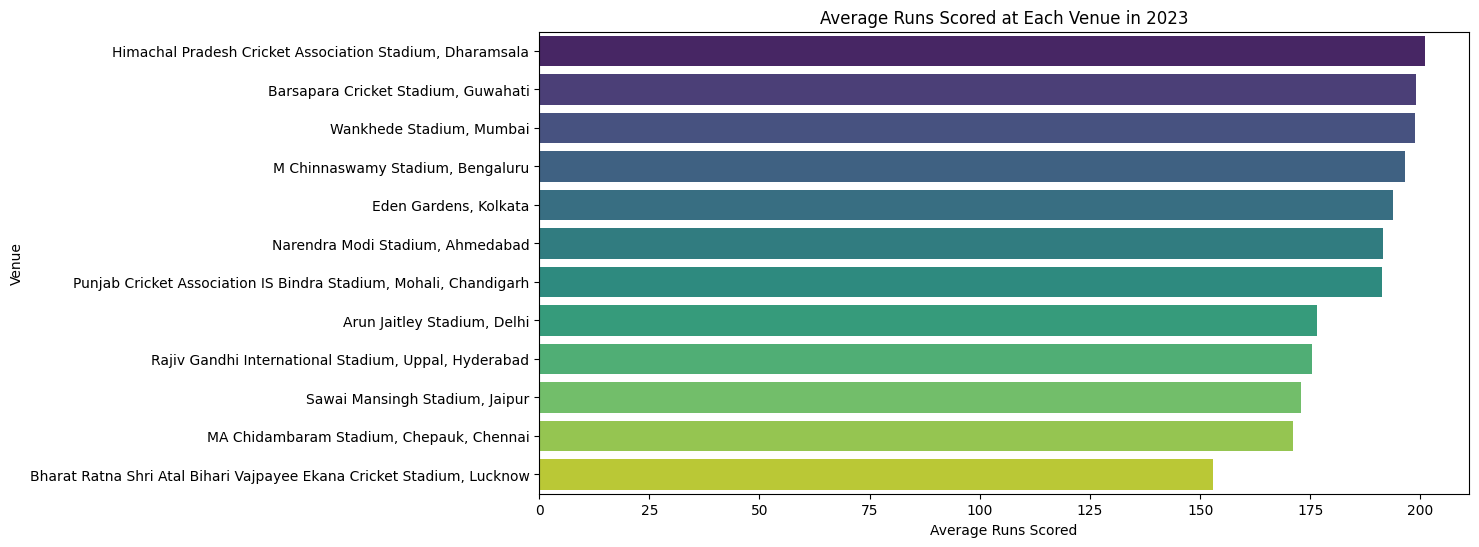

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame named 'matches'
# Filter matches for the year 2023
matches_2023 = matches[matches['season']=='2023']

# Group by 'venue' and calculate the mean of 'target_runs'
venue_avg_runs = matches_2023.groupby('venue')['target_runs'].mean().reset_index()

# Sort the venues by average runs scored
venue_avg_runs_sorted = venue_avg_runs.sort_values(by='target_runs', ascending=False)

print(venue_avg_runs_sorted)
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=venue_avg_runs_sorted, x='target_runs', y='venue', palette='viridis')
plt.xlabel('Average Runs Scored')
plt.ylabel('Venue')
plt.title('Average Runs Scored at Each Venue in 2023')
plt.show()


Sunrisers Hyderabad            10
Delhi Capitals                  9
Punjab Kings                    8
Kolkata Knight Riders           8
Mumbai Indians                  7
Royal Challengers Bangalore     7
Lucknow Super Giants            7
Rajasthan Royals                7
Chennai Super Kings             6
Gujarat Titans                  6
Name: count, dtype: int64


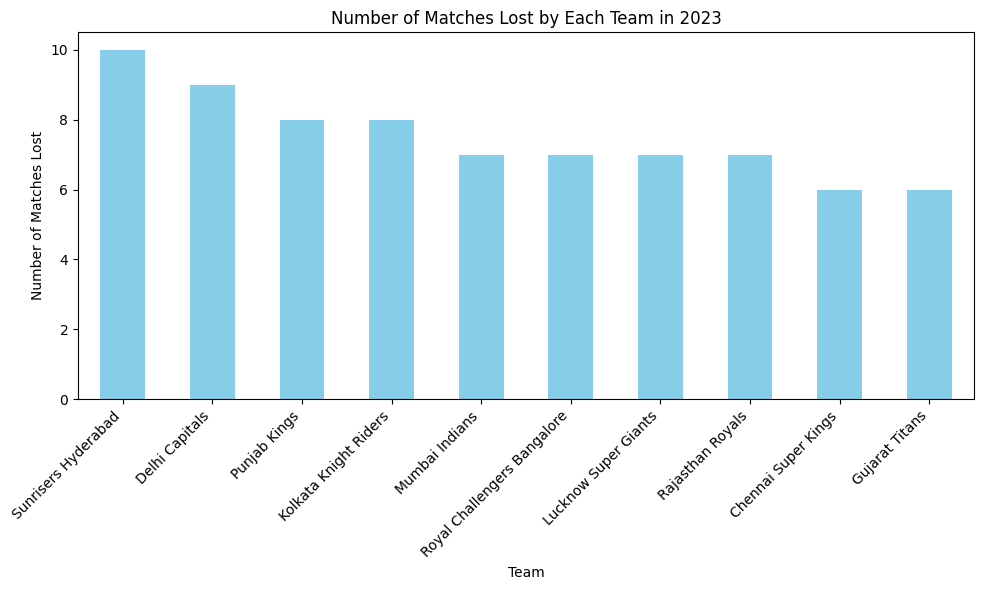

In [134]:
import pandas as pd

# Assuming your DataFrame is named 'matches'
# Filter matches for the year 2023
matches_2023 = matches[matches['season'] == '2023']

# Identify matches where the team did not win
lost_matches_team1 = matches_2023[matches_2023['team1'] != matches_2023['winner']]
lost_matches_team2 = matches_2023[matches_2023['team2'] != matches_2023['winner']]

# Create a DataFrame containing the losing team for each match
lost_teams = pd.concat([lost_matches_team1['team1'], lost_matches_team2['team2']]).reset_index(drop=True)

# Count the occurrences of each team in the losing matches
matches_lost_per_team = lost_teams.value_counts()

print(matches_lost_per_team)

import matplotlib.pyplot as plt

# Plotting the number of matches lost by each team
plt.figure(figsize=(10, 6))
matches_lost_per_team.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Lost by Each Team in 2023')
plt.xlabel('Team')
plt.ylabel('Number of Matches Lost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [135]:
import pandas as pd

# Assuming your DataFrame is named 'matches'
# Filter matches for the year 2023
matches_2023_2 = matches[matches['season'] == '2023']

# Identify matches where the team did not win
lost_matches_team1 = matches_2023_2[(matches_2023_2['team1'] == 'Gujarat Titans') & (matches_2023_2['team1'] != matches_2023_2['winner'])]
lost_matches_team2 = matches_2023_2[(matches_2023_2['team2'] == 'Gujarat Titans') & (matches_2023_2['team2'] != matches_2023_2['winner'])]

# Concatenate the DataFrames to include all matches lost by "Gujarat Titans"
lost_matches_gujarat = pd.concat([lost_matches_team1, lost_matches_team2])

# Display the matches lost by "Gujarat Titans"
lost_matches_gujarat.head(10)


id season       city        date   match_type player_of_match  \
962   1359487   2023  Ahmedabad  2023-04-09       League        RK Singh   
972   1359497   2023  Ahmedabad  2023-04-16       League      SO Hetmyer   
1023  1370353   2023  Ahmedabad  2023-05-29        Final       DP Conway   
993   1359518   2023  Ahmedabad  2023-05-02       League  Mohammed Shami   
1006  1359531   2023     Mumbai  2023-05-12       League        SA Yadav   
1020  1370350   2023    Chennai  2023-05-23  Qualifier 1      RD Gaikwad   

                                         venue                team1  \
962           Narendra Modi Stadium, Ahmedabad       Gujarat Titans   
972           Narendra Modi Stadium, Ahmedabad       Gujarat Titans   
1023          Narendra Modi Stadium, Ahmedabad       Gujarat Titans   
993           Narendra Modi Stadium, Ahmedabad       Delhi Capitals   
1006                  Wankhede Stadium, Mumbai       Mumbai Indians   
1020  MA Chidambaram Stadium, Chepauk, Chennai  Chennai Super Kings   

                      team2          toss_winner toss_decision  \
962   Kolkata Knight Riders       Gujarat Titans           bat   
972        Rajasthan Royals     Rajasthan Royals         field   
1023    Chennai Super Kings  Chennai Super Kings         field   
993          Gujarat Titans       Delhi Capitals           bat   
1006         Gujarat Titans       Gujarat Titans         field   
1020         Gujarat Titans       Gujarat Titans         field   

                     winner   result  result_margin  target_runs  \
962   Kolkata Knight Riders  wickets            3.0        205.0   
972        Rajasthan Royals  wickets            3.0        178.0   
1023    Chennai Super Kings  wickets            5.0        171.0   
993          Delhi Capitals     runs            5.0        131.0   
1006         Mumbai Indians     runs           27.0        219.0   
1020    Chennai Super Kings     runs           15.0        173.0   

      target_overs super_over method       umpire1       umpire2  
962           20.0          N    NaN   Nitin Menon  Tapan Sharma  
972           20.0          N    NaN  AK Chaudhary   CB Gaffaney  
1023          15.0          N    D/L   Nitin Menon     RJ Tucker  
993           20.0          N    NaN      MA Gough      R Pandit  
1006          20.0          N    NaN   Nitin Menon  Tapan Sharma  
1020          20.0          N    NaN  AK Chaudhary   CB Gaffaney

### Result = 'Wickets'


In [136]:
matches[(matches['season']=='2023') & (matches['result']=='wickets')]

id season        city        date match_type  player_of_match  \
950   1359475   2023   Ahmedabad  2023-03-31     League      Rashid Khan   
954   1359479   2023   Bengaluru  2023-04-02     League     F du Plessis   
956   1359481   2023       Delhi  2023-04-04     League  B Sai Sudharsan   
959   1359484   2023     Lucknow  2023-04-07     League        KH Pandya   
961   1359486   2023      Mumbai  2023-04-08     League        RA Jadeja   
962   1359487   2023   Ahmedabad  2023-04-09     League         RK Singh   
963   1359488   2023   Hyderabad  2023-04-09     League         S Dhawan   
964   1359489   2023   Bengaluru  2023-04-10     League         N Pooran   
965   1359490   2023       Delhi  2023-04-11     League        RG Sharma   
967   1359492   2023  Chandigarh  2023-04-13     League        MM Sharma   
970   1359495   2023     Lucknow  2023-04-15     League    Sikandar Raza   
971   1359496   2023      Mumbai  2023-04-16     League          VR Iyer   
972   1359497   2023   Ahmedabad  2023-04-16     League       SO Hetmyer   
977   1359502   2023       Delhi  2023-04-20     League         I Sharma   
978   1359503   2023     Chennai  2023-04-21     League        RA Jadeja   
988   1359513   2023     Kolkata  2023-04-29     League         J Little   
990   1359515   2023     Chennai  2023-04-30     League        DP Conway   
991   1359516   2023      Mumbai  2023-04-30     League      YBK Jaiswal   
995   1359520   2023  Chandigarh  2023-05-03     League     Ishan Kishan   
997   1359522   2023      Jaipur  2023-05-05     League      Rashid Khan   
998   1359523   2023     Chennai  2023-05-06     League      M Pathirana   
999   1359524   2023       Delhi  2023-05-06     League          PD Salt   
1001  1359526   2023      Jaipur  2023-05-07     League      GD Phillips   
1002  1359527   2023     Kolkata  2023-05-08     League       AD Russell   
1003  1359528   2023      Mumbai  2023-05-09     League         SA Yadav   
1005  1359530   2023     Kolkata  2023-05-11     League      YBK Jaiswal   
1007  1359532   2023   Hyderabad  2023-05-13     League        PN Mankad   
1010  1359535   2023     Chennai  2023-05-14     League         RK Singh   
1014  1359539   2023   Hyderabad  2023-05-18     League          V Kohli   
1015  1359540   2023  Dharamsala  2023-05-19     League       D Padikkal   
1018  1359543   2023      Mumbai  2023-05-21     League          C Green   
1019  1359544   2023   Bengaluru  2023-05-21     League     Shubman Gill   
1023  1370353   2023   Ahmedabad  2023-05-29      Final        DP Conway   

                                                  venue  \
950                    Narendra Modi Stadium, Ahmedabad   
954                    M Chinnaswamy Stadium, Bengaluru   
956                         Arun Jaitley Stadium, Delhi   
959   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   
961                            Wankhede Stadium, Mumbai   
962                    Narendra Modi Stadium, Ahmedabad   
963   Rajiv Gandhi International Stadium, Uppal, Hyd...   
964                    M Chinnaswamy Stadium, Bengaluru   
965                         Arun Jaitley Stadium, Delhi   
967   Punjab Cricket Association IS Bindra Stadium, ...   
970   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   
971                            Wankhede Stadium, Mumbai   
972                    Narendra Modi Stadium, Ahmedabad   
977                         Arun Jaitley Stadium, Delhi   
978            MA Chidambaram Stadium, Chepauk, Chennai   
988                               Eden Gardens, Kolkata   
990            MA Chidambaram Stadium, Chepauk, Chennai   
991                            Wankhede Stadium, Mumbai   
995   Punjab Cricket Association IS Bindra Stadium, ...   
997                      Sawai Mansingh Stadium, Jaipur   
998            MA Chidambaram Stadium, Chepauk, Chennai   
999                         Arun Jaitley Stadium, Delhi   
1001                     Sawai Mansingh Stadium, Jaipur   
1002      

Average Result Margin for Losing Teams in 2023 (Wickets):
Mumbai Indians: 7.00
Sunrisers Hyderabad: 7.00
Rajasthan Royals: 6.33
Kolkata Knight Riders: 6.25
Delhi Capitals: 6.00
Punjab Kings: 5.80
Chennai Super Kings: 5.00
Royal Challengers Bangalore: 5.00
Gujarat Titans: 3.67
Lucknow Super Giants: 2.00


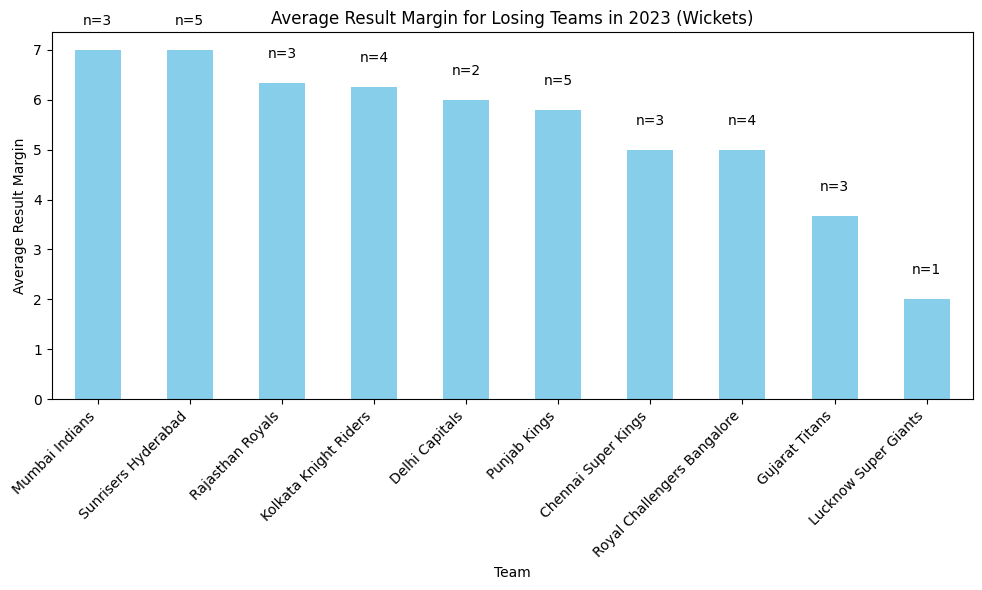

Overall Average Result Margin: 5.404999999999999

Teams needing bowlers:
Mumbai Indians: 7.00
Sunrisers Hyderabad: 7.00
Rajasthan Royals: 6.33
Kolkata Knight Riders: 6.25
Delhi Capitals: 6.00
Punjab Kings: 5.80

Teams with alright bowling:
Chennai Super Kings: 5.00
Royal Challengers Bangalore: 5.00
Gujarat Titans: 3.67
Lucknow Super Giants: 2.00


In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'matches'
# Filter matches for the year 2023 and result 'wickets'
matches_2023_wickets = matches[(matches['season'] == '2023') & (matches['result'] == 'wickets')]

# Create an empty DataFrame to store losing teams and their result margins
lost_matches = pd.DataFrame(columns=['losing_team', 'result_margin'])

# Iterate over each row in matches_2023_wickets
for index, row in matches_2023_wickets.iterrows():
    # Determine the losing team
    losing_team = row['team1'] if row['winner'] == row['team2'] else row['team2']

    # Add losing team and result_margin to the new DataFrame
    lost_matches.loc[len(lost_matches)] = [losing_team, row['result_margin']]
#print(lost_matches)
# Calculate average result_margin for each losing team
average_margin_per_team = lost_matches.groupby('losing_team')['result_margin'].mean()

# Sort the average_margin_per_team in descending order
average_margin_per_team_sorted = average_margin_per_team.sort_values(ascending=False)

# Print the average result margin for each losing team
print("Average Result Margin for Losing Teams in 2023 (Wickets):")
for team, avg_margin in average_margin_per_team_sorted.items():
    print(f"{team}: {avg_margin:.2f}")

# Plot the average result_margin for each losing team
# Plot the average result_margin for each losing team with the number of matches considered
plt.figure(figsize=(10, 6))
bars = average_margin_per_team_sorted.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Add text labels for the number of matches considered above each bar
for i, v in enumerate(average_margin_per_team_sorted):
    plt.text(i, v + 0.5, f'n={lost_matches[lost_matches["losing_team"]==average_margin_per_team_sorted.index[i]].shape[0]}', ha='center')

plt.title('Average Result Margin for Losing Teams in 2023 (Wickets)')
plt.xlabel('Team')
plt.ylabel('Average Result Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the overall average result margin
overall_average_margin = average_margin_per_team.mean()

# Create lists to store teams needing bowlers and teams with alright bowling
teams_needing_bowlers1 = []
teams_alright_bowling1 = []

# Iterate over each team and its average result margin
for team, avg_margin in average_margin_per_team.items():
    if avg_margin >= overall_average_margin:
        teams_needing_bowlers1.append((team, avg_margin))
    else:
        teams_alright_bowling1.append((team, avg_margin))

# Print the overall average result margin
print("Overall Average Result Margin:", overall_average_margin)
# Sort teams needing bowlers by average margin
teams_needing_bowlers_sorted1 = sorted(teams_needing_bowlers1, key=lambda x: x[1], reverse=True)

# Sort teams with alright bowling by average margin
teams_alright_bowling_sorted1 = sorted(teams_alright_bowling1, key=lambda x: x[1], reverse=True)

# Print the lists
print("\nTeams needing bowlers:")
for team, avg_margin in teams_needing_bowlers_sorted1:
    print(f"{team}: {avg_margin:.2f}")

print("\nTeams with alright bowling:")
for team, avg_margin in teams_alright_bowling_sorted1:
    print(f"{team}: {avg_margin:.2f}")

# The higher the average means that not good at taking wickets while defending totals -> more wickets taken is better chances of winning
# If average is low:
## -> if team has won lots of matches - good sign
## -> if team has lost lots of matches - means that the team is unable to restrict opposition (might be strikerate issue)

losing_team
Chennai Super Kings             2.814815
Delhi Capitals                  8.571429
Gujarat Titans                  6.777778
Kolkata Knight Riders          29.785714
Lucknow Super Giants           -7.166667
Mumbai Indians                 32.142857
Punjab Kings                   14.337143
Rajasthan Royals               -0.847619
Royal Challengers Bangalore    -6.107143
Sunrisers Hyderabad             9.109524
Name: target_runs_difference, dtype: float64


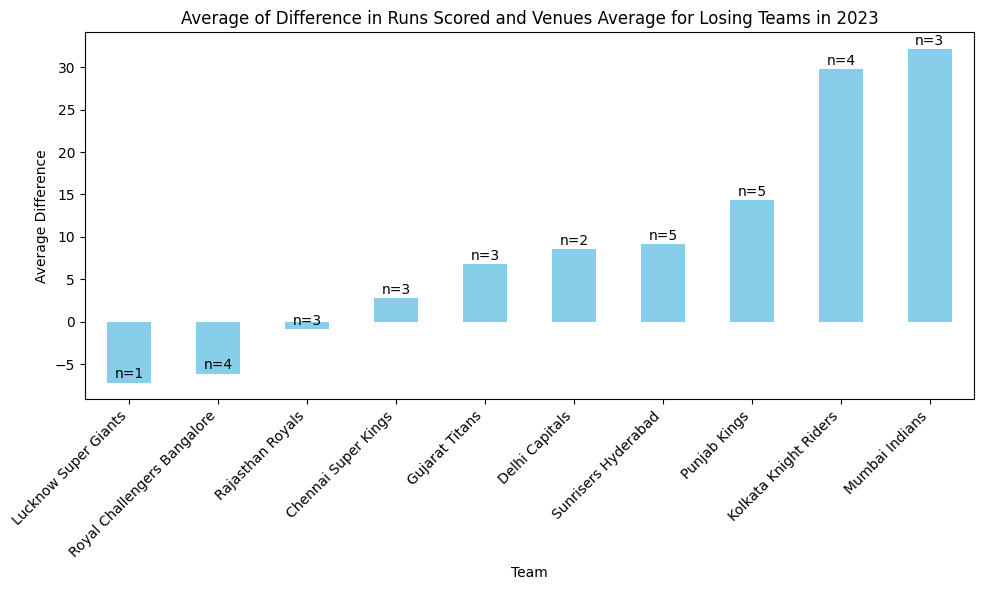


Teams needing batters:
Mumbai Indians: 32.14
Kolkata Knight Riders: 29.79
Punjab Kings: 14.34
Sunrisers Hyderabad: 9.11
Delhi Capitals: 8.57
Gujarat Titans: 6.78
Chennai Super Kings: 2.81

Teams needing bowlers:
Lucknow Super Giants: -7.17
Royal Challengers Bangalore: -6.11
Rajasthan Royals: -0.85


In [138]:
import pandas as pd

# Assuming your DataFrame is named 'matches'
# Filter matches for the year 2023 and result 'wickets'
matches_2023_wickets = matches[(matches['season'] == '2023') & (matches['result'] == 'wickets')]

# Function to calculate the difference between target runs and average runs scored in a venue
def calculate_difference(row):
    venue = row['venue']
    target_runs = row['target_runs']
    average_runs_venue = matches_2023[matches_2023['venue'] == venue]['target_runs'].mean()
    #print(target_runs,average_runs_venue,venue)
    return average_runs_venue - target_runs

# Create a list to store dictionaries of losing team and difference in target runs and average runs scored in that venue
losing_teams_data = []

# Iterate through matches to populate the list
for index, row in matches_2023_wickets.iterrows():
    if row['winner'] != row['team1']:
        losing_team = row['team1']
    else:
        losing_team = row['team2']
    target_runs_difference = calculate_difference(row)
    losing_teams_data.append({'losing_team': losing_team, 'target_runs_difference': target_runs_difference})

# Create a DataFrame from the list of dictionaries
losing_teams_df = pd.DataFrame(losing_teams_data)
#print(losing_teams_df)
# Calculate the average of target runs difference for each losing team
average_difference_per_team = losing_teams_df.groupby('losing_team')['target_runs_difference'].mean()

print(average_difference_per_team)
import matplotlib.pyplot as plt

# Plotting the average difference per team
plt.figure(figsize=(10, 6))
average_difference_per_team.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average of Difference in Runs Scored and Venues Average for Losing Teams in 2023')
plt.xlabel('Team')
plt.ylabel('Average Difference')
plt.xticks(rotation=45, ha='right')

# Add text labels for the number of matches considered above each bar
for i, (team, avg_diff) in enumerate(average_difference_per_team.sort_values().items()):
    num_matches = losing_teams_df[losing_teams_df['losing_team'] == team]['target_runs_difference'].count()
    plt.text(i, avg_diff + 0.5, f'n={num_matches}', ha='center')

plt.tight_layout()
plt.show()
# Filter teams needing batters (positive average difference)
teams_needing_batters_sorted2 = average_difference_per_team[average_difference_per_team > 0].sort_values(ascending=False)

# Filter teams needing better bowlers (negative average difference)
teams_needing_bowlers_sorted2 = average_difference_per_team[average_difference_per_team < 0].sort_values()

print("\nTeams needing batters:")
for team, avg_diff in teams_needing_batters_sorted2.items():
    print(f"{team}: {abs(avg_diff):.2f}")

print("\nTeams needing bowlers:")
for team, avg_diff in teams_needing_bowlers_sorted2.items():
    print(f"{team}: -{abs(avg_diff):.2f}")


#positive value means that they are underscoring - batting issue
#negative means that they scoring well but bowling is the problem as not able to defend the target - bowling issue

### Result = 'Runs'

In [139]:
matches[(matches['season']=='2023') & (matches['result']=='runs')]

id season        city        date   match_type player_of_match  \
951   1359476   2023  Chandigarh  2023-04-01       League  Arshdeep Singh   
952   1359477   2023     Lucknow  2023-04-01       League         MA Wood   
953   1359478   2023   Hyderabad  2023-04-02       League      JC Buttler   
955   1359480   2023     Chennai  2023-04-03       League          MM Ali   
957   1359482   2023    Guwahati  2023-04-05       League        NT Ellis   
958   1359483   2023     Kolkata  2023-04-06       League       SN Thakur   
960   1359485   2023    Guwahati  2023-04-08       League     YBK Jaiswal   
966   1359491   2023     Chennai  2023-04-12       League        R Ashwin   
968   1359493   2023     Kolkata  2023-04-14       League        HC Brook   
969   1359494   2023   Bengaluru  2023-04-15       League         V Kohli   
973   1359498   2023   Bengaluru  2023-04-17       League       DP Conway   
974   1359499   2023   Hyderabad  2023-04-18       League         C Green   
975   1359500   2023      Jaipur  2023-04-19       League      MP Stoinis   
976   1359501   2023  Chandigarh  2023-04-20       League  Mohammed Siraj   
979   1359504   2023     Lucknow  2023-04-22       League       MM Sharma   
980   1359505   2023      Mumbai  2023-04-22       League       SM Curran   
981   1359506   2023   Bengaluru  2023-04-23       League      GJ Maxwell   
982   1359507   2023     Kolkata  2023-04-23       League       AM Rahane   
983   1359508   2023   Hyderabad  2023-04-24       League        AR Patel   
984   1359509   2023   Ahmedabad  2023-04-25       League       A Manohar   
985   1359510   2023   Bengaluru  2023-04-26       League        CV Varun   
986   1359511   2023      Jaipur  2023-04-27       League     YBK Jaiswal   
987   1359512   2023  Chandigarh  2023-04-28       League      MP Stoinis   
989   1359514   2023       Delhi  2023-04-29       League        MR Marsh   
992   1359517   2023     Lucknow  2023-05-01       League    F du Plessis   
993   1359518   2023   Ahmedabad  2023-05-02       League  Mohammed Shami   
996   1359521   2023   Hyderabad  2023-05-04       League        CV Varun   
1000  1359525   2023   Ahmedabad  2023-05-07       League    Shubman Gill   
1004  1359529   2023     Chennai  2023-05-10       League       RA Jadeja   
1006  1359531   2023      Mumbai  2023-05-12       League        SA Yadav   
1008  1359533   2023       Delhi  2023-05-13       League  P Simran Singh   
1009  1359534   2023      Jaipur  2023-05-14       League      WD Parnell   
1011  1359536   2023   Ahmedabad  2023-05-15       League    Shubman Gill   
1012  1359537   2023     Lucknow  2023-05-16       League      MP Stoinis   
1013  1359538   2023  Dharamsala  2023-05-17       League      RR Rossouw   
1016  1359541   2023       Delhi  2023-05-20       League      RD Gaikwad   
1017  1359542   2023     Kolkata  2023-05-20       League        N Pooran   
1020  1370350   2023     Chennai  2023-05-23  Qualifier 1      RD Gaikwad   
1021  1370351   2023     Chennai  2023-05-24   Eliminator   Akash Madhwal   
1022  1370352   2023   Ahmedabad  2023-05-26  Qualifier 2    Shubman Gill   

                                                  venue  \
951   Punjab Cricket Association IS Bindra Stadium, ...   
952   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   
953   Rajiv Gandhi International Stadium, Uppal, Hyd...   
955            MA Chidambaram Stadium, Chepauk, Chennai   
957                 Barsapara Cricket Stadium, Guwahati   
958                               Eden Gardens, Kolkata   
960                 Barsapara Cricket Stadium, Guwahati   
966            MA Chidambaram Stadium, Chepauk, Chennai   
968                               Eden Gardens, Kolkata   
969                    M Chinnaswamy Stadium, Bengaluru   
973                    M Chinnaswamy Stadium, Bengaluru   
974   Rajiv Gandhi International Stadium, Uppal, Hyd...   
975                      Sawai Mansingh Stadium, Jaipur   
976   Punjab Cricket Associ

                    losing_team  result_margin
0         Kolkata Knight Riders            7.0
1                Delhi Capitals           50.0
2           Sunrisers Hyderabad           72.0
3          Lucknow Super Giants           12.0
4              Rajasthan Royals            5.0
5   Royal Challengers Bangalore           81.0
6                Delhi Capitals           57.0
7           Chennai Super Kings            3.0
8         Kolkata Knight Riders           23.0
9                Delhi Capitals           23.0
10  Royal Challengers Bangalore            8.0
11          Sunrisers Hyderabad           14.0
12             Rajasthan Royals           10.0
13                 Punjab Kings           24.0
14         Lucknow Super Giants            7.0
15               Mumbai Indians           13.0
16             Rajasthan Royals            7.0
17        Kolkata Knight Riders           49.0
18          Sunrisers Hyderabad            7.0
19               Mumbai Indians           55.0
20  Royal Cha

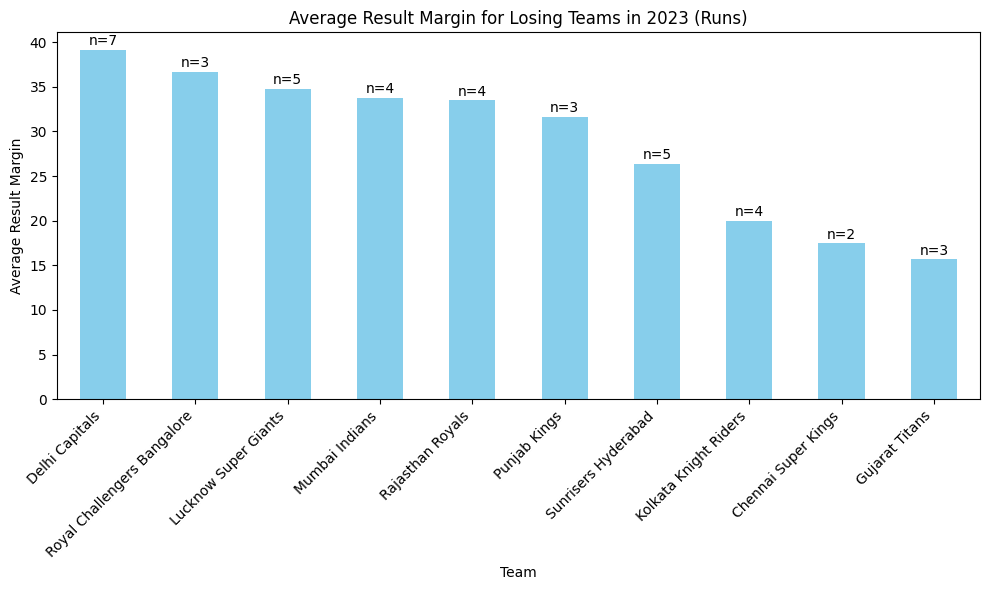

Overall Average Result Margin: 28.909285714285716

Teams needing batters:
Delhi Capitals: 39.14
Royal Challengers Bangalore: 36.67
Lucknow Super Giants: 34.80
Mumbai Indians: 33.75
Rajasthan Royals: 33.50
Punjab Kings: 31.67

Teams with alright batting:
Sunrisers Hyderabad: 26.40
Kolkata Knight Riders: 20.00
Chennai Super Kings: 17.50
Gujarat Titans: 15.67


In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'matches'
# Filter matches for the year 2023 and result 'runs'
matches_2023_runs = matches[(matches['season'] == '2023') & (matches['result'] == 'runs')]

# Create an empty DataFrame to store losing teams and their result margins
lost_matches = pd.DataFrame(columns=['losing_team', 'result_margin'])


# Iterate over each row in matches_2023_runs
for index, row in matches_2023_runs.iterrows():
    # Determine the losing team
    losing_team = row['team1'] if row['winner'] != row['team1'] else row['team2']

    # Add losing team and result_margin to the new DataFrame
    lost_matches.loc[len(lost_matches)] = [losing_team, row['result_margin']]
print(lost_matches)
# Calculate average result_margin for each losing team
average_margin_per_team = lost_matches.groupby('losing_team')['result_margin'].mean()

# Sort the average_margin_per_team in descending order
average_margin_per_team_sorted = average_margin_per_team.sort_values(ascending=False)

# Print the average result margin for each losing team
print("Average Runs Teams lost by in 2023 (Runs):")
for team, avg_margin in average_margin_per_team_sorted.items():
    print(f"{team}: {avg_margin:.2f}")

# Plot the average result_margin for each losing team
# Plot the average result_margin for each losing team with the number of matches considered
plt.figure(figsize=(10, 6))
bars = average_margin_per_team_sorted.plot(kind='bar', color='skyblue')

# Add text labels for the number of matches considered above each bar
for i, v in enumerate(average_margin_per_team_sorted):
    plt.text(i, v + 0.5, f'n={lost_matches[lost_matches["losing_team"]==average_margin_per_team_sorted.index[i]].shape[0]}', ha='center')

plt.title('Average Result Margin for Losing Teams in 2023 (Runs)')
plt.xlabel('Team')
plt.ylabel('Average Result Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the overall average result margin
overall_average_margin = average_margin_per_team.mean()

# Create lists to store teams needing bowlers and teams with alright bowling
teams_needing_bowlers3 = []
teams_alright_bowling3 = []

# Iterate over each team and its average result margin
for team, avg_margin in average_margin_per_team.items():
    if avg_margin >= overall_average_margin:
        teams_needing_bowlers3.append((team, avg_margin))
    else:
        teams_alright_bowling3.append((team, avg_margin))

# Sort teams based on the magnitude of average result margin in descending order
teams_needing_bowlers3.sort(key=lambda x: abs(x[1]), reverse=True)
teams_alright_bowling3.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the overall average result margin
print("Overall Average Result Margin:", overall_average_margin)

# Print the lists
print("\nTeams needing batters:")
for team, avg_margin in teams_needing_bowlers3:
    print(f"{team}: {avg_margin:.2f}")

print("\nTeams with alright batting:")
for team, avg_margin in teams_alright_bowling3:
    print(f"{team}: {avg_margin:.2f}")

losing_team
Chennai Super Kings            17.600000
Delhi Capitals                 11.125850
Gujarat Titans                -12.767196
Kolkata Knight Riders           5.807143
Lucknow Super Giants           10.577778
Mumbai Indians                 25.105159
Punjab Kings                   21.200000
Rajasthan Royals               -6.542857
Royal Challengers Bangalore    15.333333
Sunrisers Hyderabad             1.968254
Name: target_runs_difference, dtype: float64


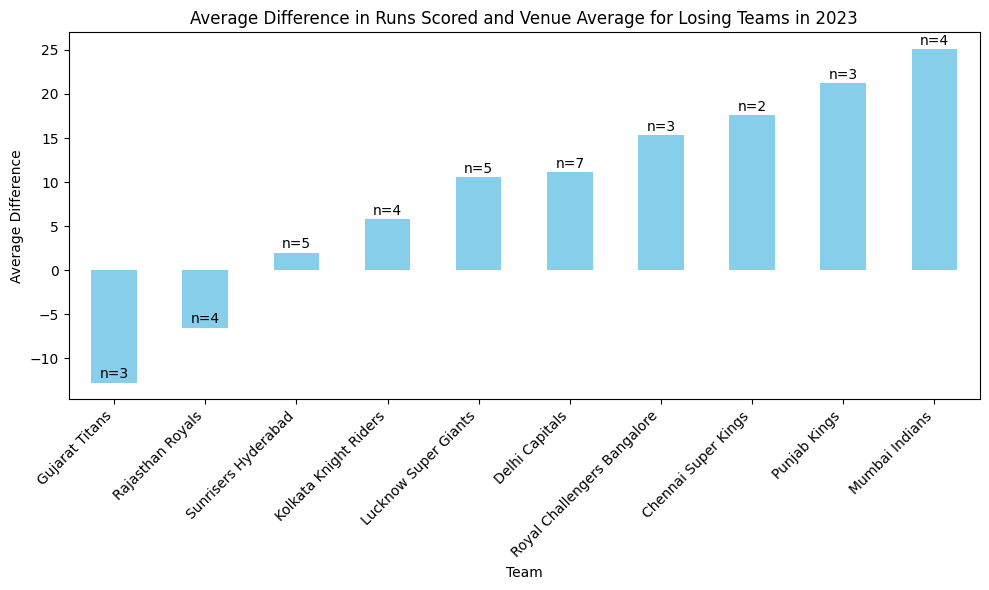

<Figure size 640x480 with 0 Axes>


Teams needing bowlers:
Mumbai Indians: 25.11
Punjab Kings: 21.20
Chennai Super Kings: 17.60
Royal Challengers Bangalore: 15.33
Delhi Capitals: 11.13
Lucknow Super Giants: 10.58
Kolkata Knight Riders: 5.81
Sunrisers Hyderabad: 1.97

Teams needing batters:
Gujarat Titans: -12.77
Rajasthan Royals: -6.54


In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'matches'
# Filter matches for the year 2023 and result 'runs'
matches_2023_runs = matches[(matches['season'] == '2023') & (matches['result'] == 'runs')]

# Function to calculate the difference between target runs and average runs scored in a venue
def calculate_difference(row):
    venue = row['venue']
    target_runs = row['target_runs']
    average_runs_venue = matches_2023[matches_2023['venue'] == venue]['target_runs'].mean()
    #print(venue,"avg",average_runs_venue,"trgt",target_runs)
    return target_runs - average_runs_venue

# Create a list to store dictionaries of losing team and difference in target runs and average runs scored in that venue
losing_teams_data = []

# Iterate through matches to populate the list
for index, row in matches_2023_runs.iterrows():
    if row['winner'] != row['team1']:
        losing_team = row['team1']
    else:
        losing_team = row['team2']
    target_runs_difference = calculate_difference(row)
    losing_teams_data.append({'losing_team': losing_team, 'target_runs_difference': target_runs_difference})

# Create a DataFrame from the list of dictionaries
losing_teams_df = pd.DataFrame(losing_teams_data)

#print(losing_teams_df)
# Calculate the average of target runs difference for each losing team
average_difference_per_team = losing_teams_df.groupby('losing_team')['target_runs_difference'].mean()
print(average_difference_per_team)

# Plotting the average difference per team
plt.figure(figsize=(10, 6))
average_difference_per_team.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Difference in Runs Scored and Venue Average for Losing Teams in 2023')
plt.xlabel('Team')
plt.ylabel('Average Difference')
plt.xticks(rotation=45, ha='right')

# Add text labels for the number of matches considered above each bar
for i, (team, avg_diff) in enumerate(average_difference_per_team.sort_values().items()):
    num_matches = losing_teams_df[losing_teams_df['losing_team'] == team]['target_runs_difference'].count()
    plt.text(i, avg_diff + 0.5, f'n={num_matches}', ha='center')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

# Extract teams needing batters (positive average difference) and their values
teams_needing_batters4 = average_difference_per_team[average_difference_per_team < 0]
teams_needing_batters_sorted4 = teams_needing_batters4.abs().sort_values(ascending=False)

# Extract teams needing better bowlers (negative average difference) and their values
teams_needing_bowlers4 = average_difference_per_team[average_difference_per_team > 0]
teams_needing_bowlers_sorted4 = teams_needing_bowlers4.abs().sort_values(ascending=False)

print("\nTeams needing bowlers:")
for team, avg_diff in teams_needing_bowlers_sorted4.items():
    print(f"{team}: {avg_diff:.2f}")

print("\nTeams needing batters:")
for team, avg_diff in teams_needing_batters_sorted4.items():
    print(f"{team}: {-avg_diff:.2f}")



### Final Compilation

In [142]:
print("Wickets needed in lost matches while bowling \n")

# Sort teams needing bowlers by average margin
teams_needing_bowlers_sorted1 = sorted(teams_needing_bowlers1, key=lambda x: x[1], reverse=True)

# Sort teams with alright bowling by average margin
teams_alright_bowling_sorted1 = sorted(teams_alright_bowling1, key=lambda x: x[1], reverse=True)

# Print the lists
print("\nTeams needing bowlers:")
for team, avg_margin in teams_needing_bowlers_sorted1:
    print(f"{team}: {avg_margin:.2f}")

print("\nTeams with alright bowling:")
for team, avg_margin in teams_alright_bowling_sorted1:
    print(f"{team}: {avg_margin:.2f}")

print("######################################################### \n")

print("Result = 'lost by wickets'\n")
print("Venue Average  - Target : How many runs lesser than the average did the batsman end up scoring \n")

print("\nTeams needing batters:")
for team, avg_diff in teams_needing_batters_sorted2.items():
    print(f"{team}: {abs(avg_diff):.2f}")

print("\nTeams needing bowlers:")
for team, avg_diff in teams_needing_bowlers_sorted2.items():
    print(f"{team}: -{abs(avg_diff):.2f}")

print("######################################################### \n")

print("Runs teams lost by while chasing \n")
print("\nTeams needing batters:")
for team, avg_margin in teams_needing_bowlers3:
    print(f"{team}: {avg_margin:.2f}")

print("\nTeams with alright batting:")
for team, avg_margin in teams_alright_bowling3:
    print(f"{team}: {avg_margin:.2f}")

print("######################################################### \n")
print("Result = 'lost by runs' \nTarget - Venue Average : How many runs above the average did the bowlers conceed \n")
print("\nTeams needing bowlers:")
for team, avg_diff in teams_needing_bowlers_sorted4.items():
    print(f"{team}: {avg_diff:.2f}")

print("\nTeams needing batters:")
for team, avg_diff in teams_needing_batters_sorted4.items():
    print(f"{team}: {-avg_diff:.2f}")

Wickets needed in lost matches while bowling 


Teams needing bowlers:
Mumbai Indians: 7.00
Sunrisers Hyderabad: 7.00
Rajasthan Royals: 6.33
Kolkata Knight Riders: 6.25
Delhi Capitals: 6.00
Punjab Kings: 5.80

Teams with alright bowling:
Chennai Super Kings: 5.00
Royal Challengers Bangalore: 5.00
Gujarat Titans: 3.67
Lucknow Super Giants: 2.00
######################################################### 

Result = 'lost by wickets'

Venue Average  - Target : How many runs lesser than the average did the batsman end up scoring 


Teams needing batters:
Mumbai Indians: 32.14
Kolkata Knight Riders: 29.79
Punjab Kings: 14.34
Sunrisers Hyderabad: 9.11
Delhi Capitals: 8.57
Gujarat Titans: 6.78
Chennai Super Kings: 2.81

Teams needing bowlers:
Lucknow Super Giants: -7.17
Royal Challengers Bangalore: -6.11
Rajasthan Royals: -0.85
######################################################### 

Runs teams lost by while chasing 


Teams needing batters:
Delhi Capitals: 39.14
Royal Challengers Bangalore:

In [143]:
#Batters

print("1")
for team, avg_diff in teams_needing_batters_sorted2.items():
    print(f"{team}: {abs(avg_diff):.2f}")
print("2")
for team, avg_diff in teams_needing_batters_sorted4.items():
    print(f"{team}: {-avg_diff:.2f}")
###
print("3")
for team, avg_margin in teams_needing_bowlers3:
    print(f"{team}: {avg_margin:.2f}")


1
Mumbai Indians: 32.14
Kolkata Knight Riders: 29.79
Punjab Kings: 14.34
Sunrisers Hyderabad: 9.11
Delhi Capitals: 8.57
Gujarat Titans: 6.78
Chennai Super Kings: 2.81
2
Gujarat Titans: -12.77
Rajasthan Royals: -6.54
3
Delhi Capitals: 39.14
Royal Challengers Bangalore: 36.67
Lucknow Super Giants: 34.80
Mumbai Indians: 33.75
Rajasthan Royals: 33.50
Punjab Kings: 31.67


In [144]:
# Initialize dictionaries to store weighted magnitudes for each team
weighted_magnitudes = {}

# Apply weights and store weighted magnitudes for teams_needing_batters_sorted2
for team, avg_diff in teams_needing_batters_sorted2.items():
    weighted_magnitudes[team] = weighted_magnitudes.get(team, 0) + abs(avg_diff) * 0.33

# Apply weights and store weighted magnitudes for teams_needing_batters_sorted4
for team, avg_diff in teams_needing_batters_sorted4.items():
    weighted_magnitudes[team] = weighted_magnitudes.get(team, 0) + abs(avg_diff) * 0.33

# Apply weights and store weighted magnitudes for teams_needing_bowlers3
for team, avg_margin in teams_needing_bowlers3:
    weighted_magnitudes[team] = weighted_magnitudes.get(team, 0) + abs(avg_margin) * 0.33

'''# Print the weighted magnitudes for each team
for team, weighted_mag in weighted_magnitudes.items():
    print(f"{team}: {weighted_mag:.2f}")'''

# Sort the teams by their weighted magnitudes in descending order
sorted_teams_batters = sorted(weighted_magnitudes.items(), key=lambda x: x[1], reverse=True)

# Print the sorted teams with their weighted magnitudes
print("Requirements for Batters Based on Descending Scores of Importance \n")

for team, weighted_mag in sorted_teams_batters:
    print(f"{team}: {weighted_mag:.2f}")


Requirements for Batters Based on Descending Scores of Importance 

Mumbai Indians: 21.74
Delhi Capitals: 15.75
Punjab Kings: 15.18
Rajasthan Royals: 13.21
Royal Challengers Bangalore: 12.10
Lucknow Super Giants: 11.48
Kolkata Knight Riders: 9.83
Gujarat Titans: 6.45
Sunrisers Hyderabad: 3.01
Chennai Super Kings: 0.93


In [145]:
#Bowlers

print("1")
for team, avg_diff in teams_needing_bowlers_sorted2.items():
    print(f"{team}: -{abs(avg_diff):.2f}")

print("2")
for team, avg_diff in teams_needing_bowlers_sorted4.items():
    print(f"{team}: {avg_diff:.2f}")


print("3")
for team, avg_margin in teams_needing_bowlers_sorted1:
    print(f"{team}: {avg_margin:.2f}")


1
Lucknow Super Giants: -7.17
Royal Challengers Bangalore: -6.11
Rajasthan Royals: -0.85
2
Mumbai Indians: 25.11
Punjab Kings: 21.20
Chennai Super Kings: 17.60
Royal Challengers Bangalore: 15.33
Delhi Capitals: 11.13
Lucknow Super Giants: 10.58
Kolkata Knight Riders: 5.81
Sunrisers Hyderabad: 1.97
3
Mumbai Indians: 7.00
Sunrisers Hyderabad: 7.00
Rajasthan Royals: 6.33
Kolkata Knight Riders: 6.25
Delhi Capitals: 6.00
Punjab Kings: 5.80


In [146]:
# Initialize dictionaries to store weighted magnitudes for each team
weighted_magnitudes_bowlers = {}

# Apply weights and store weighted magnitudes for teams_needing_bowlers_sorted2
for team, avg_diff in teams_needing_bowlers_sorted2.items():
    weighted_magnitudes_bowlers[team] = weighted_magnitudes_bowlers.get(team, 0) + abs(avg_diff) * 0.33
    #print(f"{team}: 0.4 * {abs(avg_diff):.2f} = {0.4 * abs(avg_diff):.2f}")

# Apply weights and store weighted magnitudes for teams_needing_bowlers_sorted4
for team, avg_diff in teams_needing_bowlers_sorted4.items():
    weighted_magnitudes_bowlers[team] = weighted_magnitudes_bowlers.get(team, 0) + abs(avg_diff) * 0.33
    #print(f"{team}: 0.4 * {abs(avg_diff):.2f} = {0.4 * abs(avg_diff):.2f}")

# Apply weights and store weighted magnitudes for teams_needing_bowlers_sorted1
for team, avg_margin in teams_needing_bowlers_sorted1:
    weighted_magnitudes_bowlers[team] = weighted_magnitudes_bowlers.get(team, 0) + abs(avg_margin) * 0.33
    #print(f"{team}: 0.2 * {abs(avg_margin):.2f} = {0.2 * abs(avg_margin):.2f}")

# Sort the teams by their weighted magnitudes in descending order
sorted_teams_bowlers = sorted(weighted_magnitudes_bowlers.items(), key=lambda x: x[1], reverse=True)

# Print the sorted teams with their weighted magnitudes
print("Requirements for Bowlers Based on Descending Scores of Importance \n")
for team, weighted_mag in sorted_teams_bowlers:
    print(f"{team}: {weighted_mag:.2f}")


Requirements for Bowlers Based on Descending Scores of Importance 

Mumbai Indians: 10.59
Punjab Kings: 8.91
Royal Challengers Bangalore: 7.08
Lucknow Super Giants: 5.86
Chennai Super Kings: 5.81
Delhi Capitals: 5.65
Kolkata Knight Riders: 3.98
Sunrisers Hyderabad: 2.96
Rajasthan Royals: 2.37


In [147]:
# Print the sorted teams with their weighted magnitudes
print("Requirements for Batters Based on Descending Scores of Importance \n")
for team, weighted_mag in sorted_teams_batters:
    print(f"{team}: {weighted_mag:.2f}")

# Print the sorted teams with their weighted magnitudes
print("\nRequirements for Bowlers Based on Descending Scores of Importance \n")
for team, weighted_mag in sorted_teams_bowlers:
    print(f"{team}: {weighted_mag:.2f}")

Requirements for Batters Based on Descending Scores of Importance 

Mumbai Indians: 21.74
Delhi Capitals: 15.75
Punjab Kings: 15.18
Rajasthan Royals: 13.21
Royal Challengers Bangalore: 12.10
Lucknow Super Giants: 11.48
Kolkata Knight Riders: 9.83
Gujarat Titans: 6.45
Sunrisers Hyderabad: 3.01
Chennai Super Kings: 0.93

Requirements for Bowlers Based on Descending Scores of Importance 

Mumbai Indians: 10.59
Punjab Kings: 8.91
Royal Challengers Bangalore: 7.08
Lucknow Super Giants: 5.86
Chennai Super Kings: 5.81
Delhi Capitals: 5.65
Kolkata Knight Riders: 3.98
Sunrisers Hyderabad: 2.96
Rajasthan Royals: 2.37


In [148]:
# Calculate the average scores for batters and bowlers
average_score_batters = sum(weighted_mag for team, weighted_mag in sorted_teams_batters) / len(sorted_teams_batters)
average_score_bowlers = sum(weighted_mag for team, weighted_mag in sorted_teams_bowlers) / len(sorted_teams_bowlers)

# Display the average scores
print("Average Score for Batters:", average_score_batters)
print("Average Score for Bowlers:", average_score_bowlers)

# Display teams with scores greater than the averages
print("\nTeams with Scores Greater Than the Average for Batters:")
for team, weighted_mag in sorted_teams_batters:
    if weighted_mag > average_score_batters:
        print(f"{team}: {weighted_mag:.2f}")

print("\nTeams with Scores Greater Than the Average for Bowlers:")
for team, weighted_mag in sorted_teams_bowlers:
    if weighted_mag > average_score_bowlers:
        print(f"{team}: {weighted_mag:.2f}")


Average Score for Batters: 10.96839158730159
Average Score for Bowlers: 5.911483560090701

Teams with Scores Greater Than the Average for Batters:
Mumbai Indians: 21.74
Delhi Capitals: 15.75
Punjab Kings: 15.18
Rajasthan Royals: 13.21
Royal Challengers Bangalore: 12.10
Lucknow Super Giants: 11.48

Teams with Scores Greater Than the Average for Bowlers:
Mumbai Indians: 10.59
Punjab Kings: 8.91
Royal Challengers Bangalore: 7.08


# Ranking players

## Getting the ipl 2024 auction list

In [149]:
sold=pd.read_csv('/content/drive/MyDrive/ENG group project/IPL Players Sold 2024.csv')
print(sold.columns)
print(sold['TYPE'].unique())
print(sold.shape)
print(sold.iloc[0])
sold.head()

Index(['PLAYER', 'OverseasIndian', 'TYPE', 'PRICE PAID', 'Team'], dtype='object')
['All-Rounder' 'Batter' 'Bowler' 'Wicket-Keeper']
(72, 5)
PLAYER                 Daryl Mitchell
OverseasIndian               Overseas
TYPE                      All-Rounder
PRICE PAID              ₹14,00,00,000
Team              Chennai Super Kings
Name: 0, dtype: object


PLAYER OverseasIndian         TYPE     PRICE PAID  \
0     Daryl Mitchell       Overseas  All-Rounder  ₹14,00,00,000   
1       Sameer Rizvi         Indian       Batter   ₹8,40,00,000   
2     Shardul Thakur         Indian  All-Rounder   ₹4,00,00,000   
3  Mustafizur Rahman       Overseas       Bowler   ₹2,00,00,000   
4    Rachin Ravindra       Overseas  All-Rounder   ₹1,80,00,000   

                  Team  
0  Chennai Super Kings  
1  Chennai Super Kings  
2  Chennai Super Kings  
3  Chennai Super Kings  
4  Chennai Super Kings

In [150]:
unsold=pd.read_csv('/content/drive/MyDrive/ENG group project/IPL Players Unsold 2024.csv')
print(unsold.columns)
print(unsold.shape)
print(unsold['TYPEBatterWicket-KeeperBowlerAll-Rounder'].unique())
print(unsold.iloc[0])
unsold.head()

Index(['PLAYER', 'NATIONALITYOverseasIndian',
       'TYPEBatterWicket-KeeperBowlerAll-Rounder', 'BASE PRICE'],
      dtype='object')
(260, 4)
['Batter' 'Wicket-Keeper' 'Bowler' 'All-Rounder']
PLAYER                                       Steve Smith
NATIONALITYOverseasIndian                       Overseas
TYPEBatterWicket-KeeperBowlerAll-Rounder          Batter
BASE PRICE                                  ₹2,00,00,000
Name: 0, dtype: object


PLAYER NATIONALITYOverseasIndian  \
0            Steve Smith                  Overseas   
1            Josh Inglis                  Overseas   
2         Josh Hazlewood                  Overseas   
3            Adil Rashid                  Overseas   
4  Rassie Van Der Dussen                  Overseas   

  TYPEBatterWicket-KeeperBowlerAll-Rounder    BASE PRICE  
0                                   Batter  ₹2,00,00,000  
1                            Wicket-Keeper  ₹2,00,00,000  
2                                   Bowler  ₹2,00,00,000  
3                                   Bowler  ₹2,00,00,000  
4                                   Batter  ₹2,00,00,000

In [151]:
import pandas as pd

# Assuming 'sold' and 'unsold' are your dataframes

# Rename columns in unsold dataframe to match sold dataframe
unsold.rename(columns={'NATIONALITYOverseasIndian': 'OverseasIndian',
                       'TYPEBatterWicket-KeeperBowlerAll-Rounder': 'Type',
                       'BASE PRICE': 'PRICE PAID'}, inplace=True)

# Concatenate the two dataframes
combined_df = pd.concat([sold[['PLAYER', 'TYPE', 'OverseasIndian']],
                         unsold[['PLAYER', 'Type', 'OverseasIndian']]],
                        ignore_index=True)
# Fill missing values in 'Type' column with values from 'TYPE' column
combined_df['Type'].fillna(combined_df['TYPE'], inplace=True)

# Drop redundant column 'TYPE'
combined_df.drop(columns=['TYPE'], inplace=True)

# Print the updated combined dataframe
print("Auction 2024 list: \n")


values_from_20_to_25 = combined_df.iloc[19:25]
values_from_20_to_25.head()

Auction 2024 list: 



PLAYER OverseasIndian         Type
19      Sushant Mishra         Indian       Bowler
20        Kartik Tyagi         Indian       Bowler
21  Azmatullah Omarzai       Overseas  All-Rounder
22        Manav Suthar         Indian       Bowler
23      Mitchell Starc       Overseas       Bowler

## Getting auction player stats

In [152]:
player_info = pd.read_csv("/content/drive/MyDrive/ENG group project/players_info.csv")
print(player_info.columns)
player_info.head()

Index(['player_id', 'player_object_id', 'player_name', 'dob', 'dod', 'gender',
       'batting_style', 'bowling_style', 'country_id', 'image_url',
       'image_metadata'],
      dtype='object')


player_id  player_object_id       player_name         dob  dod gender  \
0      93957           1046619       Avinash Pai  1982-01-24  NaN      M   
1       2182             51462  Sherwin Campbell  1970-11-01  NaN      M   
2      48391             56194       Tamim Iqbal  1989-03-20  NaN      M   
3       2198             55935        Javed Omar  1976-11-25  NaN      M   
4      52290            298438         Jason Roy  1990-07-21  NaN      M   

    batting_style       bowling_style  country_id  \
0  right-hand bat  right-arm offbreak        18.0   
1  right-hand bat    right-arm medium         4.0   
2   left-hand bat                 NaN        25.0   
3  right-hand bat            legbreak        25.0   
4  right-hand bat                 NaN         1.0   

                                           image_url  \
0                                                NaN   
1  https://img1.hscicdn.com/image/upload/f_auto,t...   
2  https://img1.hscicdn.com/image/upload/f_auto,t...   
3  https://img1.hscicdn.com/image/upload/f_auto,t...   
4  https://img1.hscicdn.com/image/upload/f_auto,t...   

                                      image_metadata  
0                                                NaN  
1  {'id': 326616, 'url': '/db/PICTURES/CMS/326600...  
2  {'id': 303166, 'url': '/db/PICTURES/CMS/303100...  
3  {'id': 302990, 'url': '/db/PICTURES/CMS/302900...  
4  {'id': 303963, 'url': '/db/PICTURES/CMS/303900...

### International batter stats

In [153]:
import pandas as pd

# Load your datasets
batting_info = pd.read_csv("/content/drive/MyDrive/ENG group project/t20i_Batting_Card.csv")
# player_info should be loaded similarly
# player_info = pd.read_csv("/path/to/player_info.csv")

# Perform a left join on the 'player_id' and 'batsman' columns
merged_df = pd.merge(batting_info, player_info, left_on='batsman', right_on='player_id', how='left')

# Select the required columns
merged_df = merged_df[['player_name', 'runs', 'strikeRate']]

# Drop rows with NaN values
merged_df.dropna(inplace=True)

# Ensure 'runs' and 'strikeRate' are numeric
merged_df['runs'] = pd.to_numeric(merged_df['runs'], errors='coerce')
merged_df['strikeRate'] = pd.to_numeric(merged_df['strikeRate'], errors='coerce')

# Drop rows with NaN values in 'runs' and 'strikeRate' columns after conversion
merged_df.dropna(subset=['runs', 'strikeRate'], inplace=True)

# Group by player name and calculate the sum of runs, the average runs, and the average strike rate
summary_df = merged_df.groupby('player_name').agg(
    total_runs=('runs', 'sum'),
    average_strike_rate=('strikeRate', 'mean'),
    matches_played=('runs', 'count')
).reset_index()

# Calculate the average runs per match
summary_df['average_runs'] = summary_df['total_runs'] / summary_df['matches_played']
# Select and reorder the columns
summary_df = summary_df[['player_name', 'total_runs', 'average_runs', 'average_strike_rate']]

# Print the resulting summary dataframe
summary_df.head(10)


player_name  total_runs  average_runs  average_strike_rate
0       Pathirage Sadev         1.0      1.000000            25.000000
1        AB de Villiers      1672.0     22.293333           117.097333
2            AN Hyobeom         8.0      4.000000            70.000000
3      Aaftab Alam Khan       289.0     11.115385            87.528846
4      Aaftab Limdawala        91.0     10.111111            62.366667
5  Aahan Gopinath Achar         3.0      1.000000            77.776667
6          Aakash Chand         2.0      1.000000            20.000000
7           Aamer Ikram        58.0     14.500000            79.642500
8           Aamer Jamal        88.0     17.600000           167.774000
9           Aamer Yamin        15.0     15.000000           250.000000

In [154]:
batting_info.head()

Match ID  innings      team  batsman  runs  balls  fours  sixes  \
0    361657        1  Zimbabwe  10423.0  53.0   38.0    5.0    3.0   
1    361657        1  Zimbabwe  49282.0  12.0   22.0    2.0    0.0   
2    361657        1  Zimbabwe  47619.0   8.0   26.0    0.0    0.0   
3    361657        1  Zimbabwe  10421.0   4.0    6.0    1.0    0.0   
4    361660        1  Pakistan  11647.0  44.0   41.0    4.0    1.0   

   strikeRate isOut wicketType   fielders   bowler  
0      139.47  True    run out  ['47099']      NaN  
1       54.54  True     caught  ['47738']   8270.0  
2       30.76  True     caught  ['19596']  47099.0  
3       66.66  True     caught   ['8270']   4169.0  
4      107.31  True     caught  ['15267']  50377.0

In [155]:
import pandas as pd

# Merge the combined_df with summary_df
final_df = pd.merge(combined_df, summary_df, left_on='PLAYER', right_on='player_name', how='left')

# Drop redundant columns
final_df.drop(columns=['player_name'], inplace=True)

# Rename columns appropriately
final_df.rename(columns={
    'total_runs': 'Total Runs',
    'average_strike_rate': 'Average Strike Rate',
    'average_runs': 'Average Runs'
}, inplace=True)

# Drop rows with null values
batsman_international_stats = final_df.dropna()

# Print the final dataframe without null rows
print("Final Batsman dataframe: \n")
batsman_international_stats.head()


Final Batsman dataframe: 



PLAYER OverseasIndian         Type  Total Runs  Average Runs  \
0     Daryl Mitchell       Overseas  All-Rounder      1260.0     21.000000   
2     Shardul Thakur         Indian  All-Rounder        69.0     11.500000   
3  Mustafizur Rahman       Overseas       Bowler        78.0      3.000000   
4    Rachin Ravindra       Overseas  All-Rounder       214.0     11.888889   
7    Jhye Richardson       Overseas       Bowler        45.0      5.625000   

   Average Strike Rate  
0           123.325833  
2           150.196667  
3            67.022308  
4           102.091667  
7           150.266250

### International Bowler stats

In [156]:
bowler_info = pd.read_csv("/content/drive/MyDrive/ENG group project/t20i_Bowling_Card.csv")
print(bowler_info.columns)
bowler_info.head()

Index(['Match ID', 'innings', 'team', 'opposition', 'bowler id', 'overs',
       'balls', 'maidens', 'conceded', 'wickets', 'economy', 'dots', 'fours',
       'sixes', 'wides', 'noballs'],
      dtype='object')


Match ID  innings         team opposition  bowler id  overs  balls  \
0    300436        1  New Zealand    England    10303.0    4.0   24.0   
1    300436        1  New Zealand    England     9711.0    4.0   24.0   
2    300436        1  New Zealand    England    10325.0    3.0   18.0   
3    300436        1  New Zealand    England    49108.0    4.0   24.0   
4    300436        1  New Zealand    England     9570.0    3.0   18.0   

   maidens  conceded  wickets  economy  dots  fours  sixes  wides  noballs  
0      0.0      35.0      1.0     8.75  10.0    3.0    2.0    1.0      0.0  
1      0.0      45.0      1.0    11.25   5.0    6.0    1.0    1.0      0.0  
2      0.0      43.0      2.0    14.33   5.0    3.0    4.0    1.0      0.0  
3      0.0      22.0      2.0     5.50  10.0    1.0    1.0    0.0      0.0  
4      0.0      25.0      0.0     8.33   8.0    3.0    1.0    0.0      0.0

In [157]:
import pandas as pd

# Assuming 'bowler_info' and 'player_info' are your dataframes

# Perform a left join on the 'bowler id' and 'player_id' columns
merged_df = pd.merge(bowler_info, player_info, left_on='bowler id', right_on='player_id', how='left')

# Select the required columns
final_df = merged_df[['player_name', 'wickets', 'economy']]

# Drop rows with NaN values
final_df = final_df.dropna()

# Print the resulting dataframe
print(final_df.head())


      player_name  wickets  economy
0      Kyle Mills      1.0     8.75
1    Chris Martin      1.0    11.25
2  Paul Hitchcock      2.0    14.33
3     Tim Southee      2.0     5.50
4    Scott Styris      0.0     8.33


In [158]:
# Group by player name and calculate the sum of wickets and the average economy
bowler_summary_df = final_df.groupby('player_name').agg({'wickets': 'sum', 'economy': 'mean'}).reset_index()

# Print the resulting summary dataframe
print(bowler_summary_df)


                     player_name  wickets    economy
0                     AN Hyobeom      1.0  14.000000
1               Aaftab Limdawala      9.0   8.423333
2           Aahan Gopinath Achar     13.0   6.517778
3                   Aakash Chand      7.0   8.193333
4                    Aamer Jamal      2.0  10.830000
5                    Aamer Yamin      2.0   6.125000
6                   Aamir Kaleem     32.0   7.791429
7                      Aamir Lal      7.0   7.165000
8                   Aarif Sheikh      4.0   7.416250
9                    Aaron Finch      0.0  13.500000
10                  Aaron Hardie      4.0   8.595000
11                   Aaron Jones      6.0   8.050000
12                  Aaron Muslar      8.0   5.832500
13                Aaron Phangiso     20.0   8.000000
14                 Aaron Redmond      2.0   8.470000
15                  Aaryan Menon      0.0  12.000000
16              Aayan Afzal Khan     34.0   5.875000
17                    Abass Gbla     23.0   6.

In [159]:
# Merge combined_df with final_df on 'PLAYER' and 'player_name'
combined_final_df = pd.merge(combined_df, bowler_summary_df, left_on='PLAYER', right_on='player_name', how='left')

# Drop redundant 'player_name' column
combined_final_df.drop(columns=['player_name'], inplace=True)
bowlers_international_stats=combined_final_df.dropna()
# Print the resulting dataframe
bowlers_international_stats.columns = ['PLAYER', 'OverseasIndian', 'Type', 'Wickets', 'Economy']
bowlers_international_stats.head()


PLAYER OverseasIndian         Type  Wickets    Economy
0     Daryl Mitchell       Overseas  All-Rounder      8.0  11.347000
2     Shardul Thakur         Indian  All-Rounder     33.0   9.258333
3  Mustafizur Rahman       Overseas       Bowler    107.0   7.725000
4    Rachin Ravindra       Overseas  All-Rounder     11.0   7.589231
7    Jhye Richardson       Overseas       Bowler     19.0   8.476111

### IPL batter stats

In [160]:
ipl=pd.read_csv('/content/drive/MyDrive/ENG group project/cricket_data.csv')
print(ipl.columns)
ipl.head()

Index(['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
       'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Best_Bowling_Match',
       'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls'],
      dtype='object')


Year      Player_Name Matches_Batted Not_Outs Runs_Scored Highest_Score  \
0  2024  Ruturaj Gaikwad              2        0          61            46   
1  2023  Ruturaj Gaikwad             16        1         590            92   
2  2022  Ruturaj Gaikwad             14        0         368            99   
3  2021  Ruturaj Gaikwad             16        2         635          101*   
4  2020  Ruturaj Gaikwad              6        2         204            72   

  Batting_Average Balls_Faced Batting_Strike_Rate Centuries Half_Centuries  \
0            30.5          51              119.61         0              0   
1           42.14         400               147.5         0              4   
2           26.29         291              126.46         0              3   
3           45.35         466              136.26         1              4   
4              51         169              120.71         0              3   

  Fours Sixes Catches_Taken Stumpings Matches_Bowled Balls_Bowled  \
0     8     1             0         0              2            0   
1    46    30            17         0             16            0   
2    33    14             4         0             14            0   
3    64    23             6         0             16            0   
4    16     6             4         0              6            0   

  Runs_Conceded Wickets_Taken Best_Bowling_Match Bowling_Average Economy_Rate  \
0             0             0                  0               0            0   
1             0             0                  0               0            0   
2             0             0                  0               0            0   
3             0             0                  0               0            0   
4             0             0                  0               0            0   

  Bowling_Strike_Rate Four_Wicket_Hauls Five_Wicket_Hauls  
0                   0                 0                 0  
1                   0                 0                 0  
2                   0                 0                 0  
3                   0                 0                 0  
4                   0                 0                 0

In [161]:
import pandas as pd

# Assuming `ipl` is your DataFrame

# Convert 'Year' column to numeric, setting errors='coerce' to convert non-numeric values to NaN
ipl['Year'] = pd.to_numeric(ipl['Year'], errors='coerce')

# Drop rows with NaN values in 'Year' column
ipl = ipl.dropna(subset=['Year'])

# Convert 'Year' column to integers
ipl.loc[:, 'Year'] = ipl['Year'].astype(int)

# Ensure 'Runs_Scored', 'Batting_Average', and 'Batting_Strike_Rate' columns are numeric
ipl.loc[:, 'Runs_Scored'] = pd.to_numeric(ipl['Runs_Scored'], errors='coerce')
ipl.loc[:, 'Batting_Average'] = pd.to_numeric(ipl['Batting_Average'], errors='coerce')
ipl.loc[:, 'Batting_Strike_Rate'] = pd.to_numeric(ipl['Batting_Strike_Rate'], errors='coerce')

# Drop rows with NaN values in the columns required for calculations
ipl = ipl.dropna(subset=['Runs_Scored', 'Batting_Average', 'Batting_Strike_Rate'])

# Filter data for years up to and including 2023
ipl_filtered = ipl[ipl['Year'] <= 2023]

# Group by player name
grouped = ipl_filtered.groupby('Player_Name')

# Calculate total runs, average runs, and average strike rate
new_df = grouped.agg({
    'Runs_Scored': 'sum',
    'Batting_Average': 'mean',
    'Batting_Strike_Rate': 'mean'
}).reset_index()

# Rename columns
new_df.columns = ['Name', 'Total Runs', 'Average', 'Average Strike Rate']

# Display the new DataFrame
print(new_df.head())


              Name Total Runs   Average Average Strike Rate
0      Abdul Samad        395    19.695            121.8775
1  Abhinav Manohar        222      18.5             140.675
2  Abhishek Sharma        893    24.835              137.57
3    Abishek Porel         33      8.25              106.45
4       Adam Zampa          5  1.666667           23.806667


In [162]:
new_df[new_df['Name']=='Shahrukh Khan']

Name Total Runs    Average Average Strike Rate
152  Shahrukh Khan        426  20.283333          136.166667

In [163]:
import pandas as pd

# Assuming new_df and combined_df are defined

# Merge the combined_df with new_df
final_df = pd.merge(combined_df, new_df, left_on='PLAYER', right_on='Name', how='inner')

# Select the required columns and rename them
batsman_ipl_stats = final_df[['PLAYER', 'OverseasIndian', 'Type', 'Total Runs', 'Average', 'Average Strike Rate']]
batsman_ipl_stats.columns = ['PLAYER', 'OverseasIndian', 'Type', 'Total Runs', 'Average Runs', 'Average Strike Rate']

# Print the resulting dataframe
batsman_ipl_stats.head()


PLAYER OverseasIndian           Type Total Runs Average Runs  \
0     Daryl Mitchell       Overseas    All-Rounder         33         16.5   
1     Shardul Thakur         Indian    All-Rounder        286      6.32875   
2  Mustafizur Rahman       Overseas         Bowler         13     0.166667   
3    Jhye Richardson       Overseas         Bowler         15          7.5   
4     Tristan Stubbs       Overseas  Wicket-Keeper         27         6.75   

  Average Strike Rate  
0                75.0  
1             134.145  
2              41.745  
3                62.5  
4              65.325

In [164]:
batsman_ipl_stats[batsman_ipl_stats['PLAYER']=='Shahrukh Khan']

PLAYER OverseasIndian         Type Total Runs Average Runs  \
7  Shahrukh Khan         Indian  All-Rounder        426    20.283333   

  Average Strike Rate  
7          136.166667

In [165]:
batsman_ipl_stats.tail()

PLAYER OverseasIndian         Type Total Runs Average Runs  \
33        Travis Head       Overseas       Batter        205         28.6   
34     Jaydev Unadkat         Indian       Bowler        173     5.172857   
35  Wanindu Hasaranga       Overseas  All-Rounder         72     7.643333   
36        Akash Singh         Indian       Bowler          0          0.0   
37        Lalit Yadav         Indian       Bowler        295         23.4   

   Average Strike Rate  
33             137.405  
34           58.397143  
35               85.41  
36                 0.0  
37          105.093333

### IPL bowler stats

In [166]:
import pandas as pd

# Assuming `ipl` is your DataFrame

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
ipl = ipl.copy()

# Convert 'Year' column to numeric, setting errors='coerce' to convert non-numeric values to NaN
ipl['Year'] = pd.to_numeric(ipl['Year'], errors='coerce')

# Drop rows with NaN values in 'Year' column
ipl = ipl.dropna(subset=['Year'])

# Convert 'Year' column to integers
ipl['Year'] = ipl['Year'].astype(int)

# Create copies of the DataFrame columns to avoid SettingWithCopyWarning
ipl['Wickets_Taken'] = pd.to_numeric(ipl['Wickets_Taken'], errors='coerce').copy()
ipl['Economy_Rate'] = pd.to_numeric(ipl['Economy_Rate'], errors='coerce').copy()

# Drop rows with NaN values in the columns required for calculations
ipl = ipl.dropna(subset=['Wickets_Taken', 'Economy_Rate'])

# Filter data for years up to and including 2023
ipl_filtered = ipl[ipl['Year'] <= 2023]

# Group by player name
grouped = ipl_filtered.groupby('Player_Name')

# Calculate total wickets taken and average economy rate
bowling_stats_df = grouped.agg({
    'Wickets_Taken': 'sum',
    'Economy_Rate': 'mean'
}).reset_index()

# Rename columns
bowling_stats_df.columns = ['Name', 'Total Wickets Taken', 'Average Economy']

# Display the new DataFrame
print(bowling_stats_df.tail())


                 Name  Total Wickets Taken  Average Economy
190        Yash Dhull                    0         0.000000
191       Yash Thakur                   13         9.080000
192  Yashasvi Jaiswal                    0         9.000000
193     Yudhvir Singh                    3         8.750000
194  Yuzvendra Chahal                  187         7.755455


In [167]:
# Assuming combined_df and bowling_stats_df are defined

# Merge combined_df with bowling_stats_df based on the 'PLAYER' and 'Name' columns
final_df = pd.merge(combined_df, bowling_stats_df, left_on='PLAYER', right_on='Name', how='inner')

# Select the required columns
bowlers_ipl_stats = final_df[['PLAYER', 'OverseasIndian', 'Type', 'Total Wickets Taken', 'Average Economy']]

# Rename columns
bowlers_ipl_stats.columns = ['PLAYER', 'OverseasIndian', 'Type', 'Wickets', 'Economy']

# Print the resulting dataframe
bowlers_ipl_stats.head()


PLAYER OverseasIndian           Type  Wickets    Economy
0     Daryl Mitchell       Overseas    All-Rounder        0  13.500000
1     Shardul Thakur         Indian    All-Rounder       89   9.633750
2  Mustafizur Rahman       Overseas         Bowler       47   9.223333
3    Jhye Richardson       Overseas         Bowler        3  10.630000
4     Tristan Stubbs       Overseas  Wicket-Keeper        1   3.500000

### Consolidating International and IPL stats

#### Combining Batsman

In [168]:
import pandas as pd
import numpy as np

# Assuming you already have the batsman_ipl_stats and batsman_international_stats dataframes

# Merge the two dataframes on the 'PLAYER' column
merged_df = pd.merge(batsman_ipl_stats, batsman_international_stats, on='PLAYER', how='outer', suffixes=('_ipl', '_international'))

# Fill NaN values with 0 for easier calculation
merged_df.fillna(0, inplace=True)

# Add total runs
merged_df['Total Runs'] = merged_df['Total Runs_ipl'] + merged_df['Total Runs_international']

# Calculate average runs using Total Runs / (Total Runs / Average Runs + epsilon)
epsilon = np.finfo(float).eps  # Add a small constant to avoid division by zero
merged_df['Average Runs'] = merged_df.apply(lambda row: row['Total Runs'] / ((row['Total Runs_ipl'] / (row['Average Runs_ipl'] + epsilon)) + (row['Total Runs_international'] / (row['Average Runs_international'] + epsilon))) if row['Total Runs'] > 0 else 0, axis=1)

# Calculate weighted average strike rate where weights are runs
merged_df['Weighted Strike Rate'] = (merged_df['Average Strike Rate_ipl'] * merged_df['Total Runs_ipl'] + merged_df['Average Strike Rate_international'] * merged_df['Total Runs_international']) / (merged_df['Total Runs_ipl'] + merged_df['Total Runs_international'])

# Keep only the necessary columns and create a copy to avoid SettingWithCopyWarning
auction_batsman = merged_df[['PLAYER', 'OverseasIndian_ipl', 'Type_ipl', 'Total Runs', 'Average Runs', 'Weighted Strike Rate']].copy()

# Rename the columns
auction_batsman.rename(columns={'OverseasIndian_ipl': 'OverseasIndian', 'Type_ipl': 'Type', 'Weighted Strike Rate':'Strike Rate'}, inplace=True)
auction_batsman=auction_batsman.dropna()
# Display or use result_df as needed
auction_batsman.head()

PLAYER OverseasIndian           Type  Total Runs  Average Runs  \
0     Daryl Mitchell       Overseas    All-Rounder      1293.0     20.854839   
1     Shardul Thakur         Indian    All-Rounder       355.0      6.934867   
2  Mustafizur Rahman       Overseas         Bowler        91.0      0.875000   
3    Jhye Richardson       Overseas         Bowler        60.0      6.000000   
4     Tristan Stubbs       Overseas  Wicket-Keeper       266.0     15.647059   

   Strike Rate  
0   122.092459  
1   137.264901  
2    63.411264  
3   128.324688  
4   119.703029

In [169]:
auction_batsman.columns

Index(['PLAYER', 'OverseasIndian', 'Type', 'Total Runs', 'Average Runs',
       'Strike Rate'],
      dtype='object')

In [170]:
print(batsman_ipl_stats.isna().sum())

PLAYER                 0
OverseasIndian         0
Type                   0
Total Runs             0
Average Runs           0
Average Strike Rate    0
dtype: int64


In [171]:
print(auction_batsman.isna().sum())


PLAYER            0
OverseasIndian    0
Type              0
Total Runs        0
Average Runs      0
Strike Rate       0
dtype: int64


In [172]:
# Assuming df is your DataFrame
nan_rows = auction_batsman[auction_batsman.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [PLAYER, OverseasIndian, Type, Total Runs, Average Runs, Strike Rate]
Index: []


In [173]:
print(batsman_international_stats.isna().sum())

PLAYER                 0
OverseasIndian         0
Type                   0
Total Runs             0
Average Runs           0
Average Strike Rate    0
dtype: int64


In [174]:
print("Shahrukh Khan Data:\n", auction_batsman[auction_batsman['PLAYER'] == 'Shahrukh Khan'])

Shahrukh Khan Data:
           PLAYER OverseasIndian         Type  Total Runs  Average Runs  \
7  Shahrukh Khan         Indian  All-Rounder       426.0     20.283333   

   Strike Rate  
7   136.166667  


#### Combining bowlers

In [175]:
import pandas as pd
import numpy as np

# Assuming you have the bowlers_ipl_stats and bowlers_international_stats dataframes

# Merge the two dataframes on the 'PLAYER' column
merged_df = pd.merge(bowlers_ipl_stats, bowlers_international_stats, on='PLAYER', how='outer', suffixes=('_ipl', '_international'))

# Fill NaN values with 0 for easier calculation
merged_df.fillna(0, inplace=True)

# Add total wickets
merged_df['Total Wickets'] = merged_df['Wickets_ipl'] + merged_df['Wickets_international']

# Calculate weighted average economy where weights are wickets
epsilon = np.finfo(float).eps  # Add a small constant to avoid division by zero
merged_df['Weighted Economy'] = (merged_df['Economy_ipl'] * merged_df['Wickets_ipl'] + merged_df['Economy_international'] * merged_df['Wickets_international']) / (merged_df['Wickets_ipl'] + merged_df['Wickets_international'] + epsilon)

# Keep only the necessary columns and create a copy to avoid SettingWithCopyWarning
auction_bowlers = merged_df[['PLAYER', 'OverseasIndian_ipl', 'Type_ipl', 'Total Wickets', 'Weighted Economy']].copy()

# Rename the columns
auction_bowlers.rename(columns={'OverseasIndian_ipl': 'OverseasIndian', 'Type_ipl': 'Type'}, inplace=True)

# Display or use auction_bowlers as needed
auction_bowlers.head()

PLAYER OverseasIndian           Type  Total Wickets  \
0     Daryl Mitchell       Overseas    All-Rounder            8.0   
1     Shardul Thakur         Indian    All-Rounder          122.0   
2  Mustafizur Rahman       Overseas         Bowler          154.0   
3    Jhye Richardson       Overseas         Bowler           22.0   
4     Tristan Stubbs       Overseas  Wicket-Keeper            1.0   

   Weighted Economy  
0         11.347000  
1          9.532203  
2          8.182284  
3          8.769823  
4          3.500000

In [176]:
auction_bowlers[auction_bowlers['PLAYER'] == 'Shahrukh Khan']

PLAYER OverseasIndian         Type  Total Wickets  Weighted Economy
7  Shahrukh Khan         Indian  All-Rounder            0.0               0.0

In [177]:
auction_bowlers.columns

Index(['PLAYER', 'OverseasIndian', 'Type', 'Total Wickets',
       'Weighted Economy'],
      dtype='object')

In [178]:
print(auction_bowlers.isna().sum())


PLAYER              0
OverseasIndian      0
Type                0
Total Wickets       0
Weighted Economy    0
dtype: int64


In [179]:
# Assuming df is your DataFrame
nan_rows = auction_bowlers[auction_bowlers.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [PLAYER, OverseasIndian, Type, Total Wickets, Weighted Economy]
Index: []


#### Obtaining allrounders from 2 dataframes

In [180]:
# Assuming auction_data has columns: 'PLAYER', 'Type'

merged_data = pd.merge(auction_batsman, auction_bowlers, on='PLAYER', how='left')
all_rounder_stats = pd.merge(merged_data, auction_bowlers, on='PLAYER', how='inner')
all_rounder_stats = all_rounder_stats[all_rounder_stats['Type'] == 'All-Rounder']

# Rename and select columns
all_rounder_stats = all_rounder_stats.rename(columns={'OverseasIndian_x': 'OverseasIndian', 'Type_x': 'Type', 'Total Wickets_y': 'Total Wickets', 'Weighted Economy_y': 'Average Economy'})
all_rounder_stats = all_rounder_stats[['PLAYER', 'OverseasIndian', 'Total Runs', 'Average Runs', 'Strike Rate', 'Total Wickets', 'Average Economy']]

# Rename the result dataframe
all_rounder_stats.rename(columns={'PLAYER': 'Player'}, inplace=True)

# Display or use all_rounder_stats as needed
all_rounder_stats.head()

Player OverseasIndian OverseasIndian  Total Runs  Average Runs  \
0    Daryl Mitchell       Overseas       Overseas      1293.0     20.854839   
1    Shardul Thakur         Indian         Indian       355.0      6.934867   
7     Shahrukh Khan         Indian         Indian       426.0     20.283333   
14  Ramandeep Singh         Indian         Indian        45.0     22.500000   
16     David Willey       Overseas       Overseas       279.0      6.389313   

    Strike Rate  Total Wickets  Average Economy  
0    122.092459            8.0        11.347000  
1    137.264901          122.0         9.532203  
7    136.166667            0.0         0.000000  
14   112.500000            6.0         9.000000  
16    88.639608           57.0         8.280865

In [181]:
# Assuming df is your DataFrame
nan_rows = all_rounder_stats[all_rounder_stats.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [Player, OverseasIndian, OverseasIndian, Total Runs, Average Runs, Strike Rate, Total Wickets, Average Economy]
Index: []


## Ranking players

### Ranking Batsman using pagerank

In [182]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import MinMaxScaler


# Normalize the performance metrics
scaler = MinMaxScaler()
auction_batsman[['Total Runs', 'Average Runs', 'Strike Rate']] = scaler.fit_transform(
    auction_batsman[['Total Runs', 'Average Runs', 'Strike Rate']]
)

# Construct the graph
G = nx.DiGraph()

# Add nodes
for player in auction_batsman['PLAYER']:
    G.add_node(player)

# Add edges based on comparisons
for i in range(len(auction_batsman)):
    for j in range(len(auction_batsman)):
        if i != j:
            player_i = auction_batsman.iloc[i]
            player_j = auction_batsman.iloc[j]

            # Compare the metrics
            score_i = player_i[['Total Runs', 'Average Runs', 'Strike Rate']].sum()
            score_j = player_j[['Total Runs', 'Average Runs', 'Strike Rate']].sum()

            if score_i < score_j:
                G.add_edge(player_i['PLAYER'], player_j['PLAYER'])

# Apply PageRank algorithm
pagerank_scores = nx.pagerank(G, alpha=0.9, max_iter=200, tol=1.0e-5)

# Rank players based on PageRank scores
ranked_players = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for better readability
ranked_df_batsman = pd.DataFrame(ranked_players, columns=['PLAYER', 'PageRank'])

In [183]:
ranked_df_batsman.head(10)

PLAYER  PageRank
0      Manish Pandey  0.160224
1    Reeza Hendricks  0.084358
2        Colin Munro  0.058198
3        Travis Head  0.044780
4         Finn Allen  0.036563
5  Najibullah Zadran  0.030991
6      Rilee Rossouw  0.026953
7       Kusal Mendis  0.023885
8      Mohammad Nabi  0.021471
9        Ben Duckett  0.019521

### Ranking bowlers

In [184]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize 'Total Wickets'
auction_bowlers['Total Wickets'] = scaler.fit_transform(auction_bowlers[['Total Wickets']])

# Normalize 'Weighted Economy'
normalized_economy = scaler.fit_transform(auction_bowlers[['Weighted Economy']])

# Invert the normalized values of 'Weighted Economy'
auction_bowlers['Weighted Economy'] = 1 - normalized_economy

# Construct the graph
G = nx.DiGraph()

# Add nodes
for player in auction_bowlers['PLAYER']:
    G.add_node(player)

# Add edges based on comparisons
for i in range(len(auction_bowlers)):
    for j in range(len(auction_bowlers)):
        if i != j:
            bowler_i = auction_bowlers.iloc[i]
            bowler_j = auction_bowlers.iloc[j]

            # Compare the metrics
            score_i = bowler_i[['Total Wickets', 'Weighted Economy']].sum()
            score_j = bowler_j[['Total Wickets', 'Weighted Economy']].sum()

            if score_i < score_j:
                G.add_edge(bowler_i['PLAYER'], bowler_j['PLAYER'])

# Apply PageRank algorithm with hyperparameters
pagerank_scores = nx.pagerank(G, alpha=0.9, max_iter=200, tol=1.0e-5)

# Rank players based on PageRank scores
ranked_players = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for better readability
ranked_df_bowlers = pd.DataFrame(ranked_players, columns=['PLAYER', 'PageRank'])

In [185]:
ranked_df_bowlers.head(10)

PLAYER  PageRank
0        Tim Southee  0.169533
1  Mustafizur Rahman  0.089246
2  Wanindu Hasaranga  0.061551
3        Umesh Yadav  0.047345
4          Ish Sodhi  0.038647
5      Harshal Patel  0.032749
6     Mitchell Starc  0.028475
7        Adil Rashid  0.025229
8      Mohammad Nabi  0.022676
9     Shardul Thakur  0.020613

In [186]:
# Filter the ranked DataFrame for players whose names contain "Starc"
search_name = "Starc"
filtered_df = ranked_df_bowlers[ranked_df_bowlers['PLAYER'].str.contains(search_name, case=False)]

print(filtered_df)


           PLAYER  PageRank
6  Mitchell Starc  0.028475


### Ranking all-rounders

In [187]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize 'Total Runs', 'Average Runs', 'Strike Rate', 'Total Wickets'
all_rounder_stats[['Total Runs', 'Average Runs', 'Strike Rate', 'Total Wickets']] = scaler.fit_transform(
    all_rounder_stats[['Total Runs', 'Average Runs', 'Strike Rate', 'Total Wickets']]
)

# Normalize and invert 'Average Economy'
all_rounder_stats['Average Economy'] = scaler.fit_transform(all_rounder_stats[['Average Economy']])
all_rounder_stats['Average Economy'] = 1 - all_rounder_stats['Average Economy']

# Construct the graph
G = nx.DiGraph()

# Add nodes
for player in all_rounder_stats['Player']:
    G.add_node(player)

# Add edges based on comparisons
for i in range(len(all_rounder_stats)):
    for j in range(len(all_rounder_stats)):
        if i != j:
            allrounder_i = all_rounder_stats.iloc[i]
            allrounder_j = all_rounder_stats.iloc[j]

            # Compare the metrics
            score_i = allrounder_i[['Total Runs', 'Average Runs', 'Strike Rate', 'Total Wickets', 'Average Economy']].sum()
            score_j = allrounder_j[['Total Runs', 'Average Runs', 'Strike Rate', 'Total Wickets', 'Average Economy']].sum()

            if score_i < score_j:
                G.add_edge(allrounder_i['Player'], allrounder_j['Player'])

# Apply PageRank algorithm with hyperparameters
pagerank_scores = nx.pagerank(G, alpha=0.9, max_iter=200, tol=1.0e-5)

# Rank players based on PageRank scores
ranked_players = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for better readability
ranked_df_all_rounders = pd.DataFrame(ranked_players, columns=['Player', 'PageRank'])



In [188]:
ranked_df_all_rounders.head(10)

Player  PageRank
0      Mohammad Nabi  0.280733
1      Shahrukh Khan  0.147746
2  Wanindu Hasaranga  0.101892
3     Shashank Singh  0.078379
4     Shardul Thakur  0.063983
5        Pat Cummins  0.054224
6     Daryl Mitchell  0.047152
7      Harshal Patel  0.041781
8    Ramandeep Singh  0.037557
9       Chris Woakes  0.034143

# Clustering with Kmeans

In [189]:
ipl=pd.read_csv('/content/drive/MyDrive/ENG group project/matches.csv')
print(ipl.columns)
ipl.tail()

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


id season       city        date   match_type player_of_match  \
1019  1359544   2023  Bengaluru  2023-05-21       League    Shubman Gill   
1020  1370350   2023    Chennai  2023-05-23  Qualifier 1      RD Gaikwad   
1021  1370351   2023    Chennai  2023-05-24   Eliminator   Akash Madhwal   
1022  1370352   2023  Ahmedabad  2023-05-26  Qualifier 2    Shubman Gill   
1023  1370353   2023  Ahmedabad  2023-05-29        Final       DP Conway   

                                         venue                        team1  \
1019          M Chinnaswamy Stadium, Bengaluru  Royal Challengers Bangalore   
1020  MA Chidambaram Stadium, Chepauk, Chennai          Chennai Super Kings   
1021  MA Chidambaram Stadium, Chepauk, Chennai               Mumbai Indians   
1022          Narendra Modi Stadium, Ahmedabad               Gujarat Titans   
1023          Narendra Modi Stadium, Ahmedabad               Gujarat Titans   

                     team2          toss_winner toss_decision  \
1019        Gujarat Titans       Gujarat Titans         field   
1020        Gujarat Titans       Gujarat Titans         field   
1021  Lucknow Super Giants       Mumbai Indians           bat   
1022        Mumbai Indians       Mumbai Indians         field   
1023   Chennai Super Kings  Chennai Super Kings         field   

                   winner   result  result_margin  target_runs  target_overs  \
1019       Gujarat Titans  wickets            6.0        198.0          20.0   
1020  Chennai Super Kings     runs           15.0        173.0          20.0   
1021       Mumbai Indians     runs           81.0        183.0          20.0   
1022       Gujarat Titans     runs           62.0        234.0          20.0   
1023  Chennai Super Kings  wickets            5.0        171.0          15.0   

     super_over method       umpire1      umpire2  
1019          N    NaN   Nitin Menon    VK Sharma  
1020          N    NaN  AK Chaudhary  CB Gaffaney  
1021          N    NaN  BNJ Oxenford    VK Sharma  
1022          N    NaN   Nitin Menon    RJ Tucker  
1023          N    D/L   Nitin Menon    RJ Tucker

In [190]:
ipl_2023=ipl[ipl['season']=='2023']
ipl_2023.tail()

id season       city        date   match_type player_of_match  \
1019  1359544   2023  Bengaluru  2023-05-21       League    Shubman Gill   
1020  1370350   2023    Chennai  2023-05-23  Qualifier 1      RD Gaikwad   
1021  1370351   2023    Chennai  2023-05-24   Eliminator   Akash Madhwal   
1022  1370352   2023  Ahmedabad  2023-05-26  Qualifier 2    Shubman Gill   
1023  1370353   2023  Ahmedabad  2023-05-29        Final       DP Conway   

                                         venue                        team1  \
1019          M Chinnaswamy Stadium, Bengaluru  Royal Challengers Bangalore   
1020  MA Chidambaram Stadium, Chepauk, Chennai          Chennai Super Kings   
1021  MA Chidambaram Stadium, Chepauk, Chennai               Mumbai Indians   
1022          Narendra Modi Stadium, Ahmedabad               Gujarat Titans   
1023          Narendra Modi Stadium, Ahmedabad               Gujarat Titans   

                     team2          toss_winner toss_decision  \
1019        Gujarat Titans       Gujarat Titans         field   
1020        Gujarat Titans       Gujarat Titans         field   
1021  Lucknow Super Giants       Mumbai Indians           bat   
1022        Mumbai Indians       Mumbai Indians         field   
1023   Chennai Super Kings  Chennai Super Kings         field   

                   winner   result  result_margin  target_runs  target_overs  \
1019       Gujarat Titans  wickets            6.0        198.0          20.0   
1020  Chennai Super Kings     runs           15.0        173.0          20.0   
1021       Mumbai Indians     runs           81.0        183.0          20.0   
1022       Gujarat Titans     runs           62.0        234.0          20.0   
1023  Chennai Super Kings  wickets            5.0        171.0          15.0   

     super_over method       umpire1      umpire2  
1019          N    NaN   Nitin Menon    VK Sharma  
1020          N    NaN  AK Chaudhary  CB Gaffaney  
1021          N    NaN  BNJ Oxenford    VK Sharma  
1022          N    NaN   Nitin Menon    RJ Tucker  
1023          N    D/L   Nitin Menon    RJ Tucker

In [191]:
# Assuming `ipl_2023` is your DataFrame
selected_columns = ['team1', 'team2',
                    'winner', 'result', 'result_margin',
                    'target_runs']

# Selecting only the specified columns
selected_ipl_2023 = ipl_2023.loc[:, selected_columns]

# Displaying the selected DataFrame
selected_ipl_2023.head()


team1                        team2  \
950   Chennai Super Kings               Gujarat Titans   
951          Punjab Kings        Kolkata Knight Riders   
952  Lucknow Super Giants               Delhi Capitals   
953      Rajasthan Royals          Sunrisers Hyderabad   
954        Mumbai Indians  Royal Challengers Bangalore   

                          winner   result  result_margin  target_runs  
950               Gujarat Titans  wickets            5.0        179.0  
951                 Punjab Kings     runs            7.0        154.0  
952         Lucknow Super Giants     runs           50.0        194.0  
953             Rajasthan Royals     runs           72.0        204.0  
954  Royal Challengers Bangalore  wickets            8.0        172.0

In [192]:
selected_ipl_2023.iloc[0]

team1            Chennai Super Kings
team2                 Gujarat Titans
winner                Gujarat Titans
result                       wickets
result_margin                    5.0
target_runs                    179.0
Name: 950, dtype: object

In [193]:
rows_with_nan = selected_ipl_2023[selected_ipl_2023.isnull().any(axis=1)]
print(rows_with_nan)
#removing rows where no results
selected_ipl_2023=selected_ipl_2023.dropna()

                    team1                team2 winner     result  \
994  Lucknow Super Giants  Chennai Super Kings    NaN  no result   

     result_margin  target_runs  
994            NaN          NaN  


In [194]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()



# Encode the 'team1', 'team2', 'winner' columns
teams = selected_ipl_2023[['team1', 'team2', 'winner']]
teams_encoded = teams.apply(le.fit_transform)
selected_ipl_2023.loc[:, ['team1', 'team2', 'winner']] = teams_encoded

# Store the original team names and their encoded values in a dictionary
team_mapping = {original: encoded for original, encoded in zip(le.classes_, le.transform(le.classes_))}
print("Team names with their corresponding encoded values:")
for team, encoded_value in team_mapping.items():
    print(f"{team}: {encoded_value}")

# Encode the 'result' column
selected_ipl_2023.loc[:, 'result'] = le.fit_transform(selected_ipl_2023['result'])

# Optionally, if you want to keep separate encoders for each column:
# Create separate encoders for 'team1', 'team2', and 'winner'
team_encoder = LabelEncoder()

# Encode 'team1', 'team2', 'winner' separately
selected_ipl_2023.loc[:, 'team1'] = team_encoder.fit_transform(selected_ipl_2023['team1'])
selected_ipl_2023.loc[:, 'team2'] = team_encoder.fit_transform(selected_ipl_2023['team2'])
selected_ipl_2023.loc[:, 'winner'] = team_encoder.fit_transform(selected_ipl_2023['winner'])


Team names with their corresponding encoded values:
Chennai Super Kings: 0
Delhi Capitals: 1
Gujarat Titans: 2
Kolkata Knight Riders: 3
Lucknow Super Giants: 4
Mumbai Indians: 5
Punjab Kings: 6
Rajasthan Royals: 7
Royal Challengers Bangalore: 8
Sunrisers Hyderabad: 9


In [195]:
print(selected_ipl_2023.columns)
selected_ipl_2023.head(10)

Index(['team1', 'team2', 'winner', 'result', 'result_margin', 'target_runs'], dtype='object')


team1 team2 winner result  result_margin  target_runs
950     0     2      2      1            5.0        179.0
951     6     3      6      0            7.0        154.0
952     4     1      4      0           50.0        194.0
953     7     9      7      0           72.0        204.0
954     5     8      8      1            8.0        172.0
955     0     4      0      0           12.0        218.0
956     1     2      2      1            6.0        163.0
957     6     7      6      0            5.0        198.0
958     3     8      3      0           81.0        205.0
959     9     4      4      1            5.0        122.0

In [196]:
import pandas as pd

def get_lost_team(row):
    if row['winner'] == row['team1']:
        return row['team2']
    else:
        return row['team1']

# Adding the 'lost_team' column
selected_ipl_2023['lost_team'] = selected_ipl_2023.apply(get_lost_team, axis=1)
selected_ipl_2023.drop(columns=['winner','team1','team2'], inplace=True)


selected_ipl_2023.head()


<ipython-input-196-247f6edd529a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_ipl_2023['lost_team'] = selected_ipl_2023.apply(get_lost_team, axis=1)
<ipython-input-196-247f6edd529a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_ipl_2023.drop(columns=['winner','team1','team2'], inplace=True)


result  result_margin  target_runs  lost_team
950      1            5.0        179.0          0
951      0            7.0        154.0          3
952      0           50.0        194.0          1
953      0           72.0        204.0          9
954      1            8.0        172.0          5

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have the DataFrame selected_ipl_2023

# Mapping of encoded team values to team names
team_names = {
    0: 'Chennai Super Kings',
    1: 'Delhi Capitals',
    2: 'Gujarat Titans',
    3: 'Kolkata Knight Riders',
    4: 'Lucknow Super Giants',
    5: 'Mumbai Indians',
    6: 'Punjab Kings',
    7: 'Rajasthan Royals',
    8: 'Royal Challengers Bangalore',
    9: 'Sunrisers Hyderabad'
}

# Extracting the features for clustering
features = ['result_margin', 'target_runs', 'result']
X = selected_ipl_2023[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing the number of clusters (you can use methods like elbow method to find optimal k)
k = 3 # Adjust as needed

# Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Adding the cluster labels to the DataFrame
selected_ipl_2023['cluster'] = clusters

selected_ipl_2023.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-197-07f5601320cd>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_ipl_2023['cluster'] = clusters


result  result_margin  target_runs  lost_team  cluster
950      1            5.0        179.0          0        0
951      0            7.0        154.0          3        1
952      0           50.0        194.0          1        2
953      0           72.0        204.0          9        2
954      1            8.0        172.0          5        0

In [198]:
import pandas as pd

# Assuming you have the DataFrame selected_ipl_2023 with the specified columns

# Grouping by 'lost_team' and 'cluster', and counting occurrences
team_cluster_counts = selected_ipl_2023.groupby(['lost_team', 'cluster']).size().unstack(fill_value=0)

# Renaming columns to include 'Cluster' prefix
team_cluster_counts.columns = [f'Cluster {col}' for col in team_cluster_counts.columns]

# Resetting index to make 'lost_team' a column again
team_cluster_counts.reset_index(inplace=True)

# Mapping encoded team values to team names
team_names = {
    0: 'Chennai Super Kings',
    1: 'Delhi Capitals',
    2: 'Gujarat Titans',
    3: 'Kolkata Knight Riders',
    4: 'Lucknow Super Giants',
    5: 'Mumbai Indians',
    6: 'Punjab Kings',
    7: 'Rajasthan Royals',
    8: 'Royal Challengers Bangalore',
    9: 'Sunrisers Hyderabad'
}

# Converting encoded team values to team names
team_cluster_counts['lost_team'] = team_cluster_counts['lost_team'].map(team_names)

print(team_cluster_counts)


                     lost_team  Cluster 0  Cluster 1  Cluster 2
0          Chennai Super Kings          3          2          0
1               Delhi Capitals          2          4          3
2               Gujarat Titans          3          3          0
3        Kolkata Knight Riders          4          3          1
4         Lucknow Super Giants          1          3          2
5               Mumbai Indians          3          2          2
6                 Punjab Kings          5          2          1
7             Rajasthan Royals          3          3          1
8  Royal Challengers Bangalore          4          2          1
9          Sunrisers Hyderabad          5          4          1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


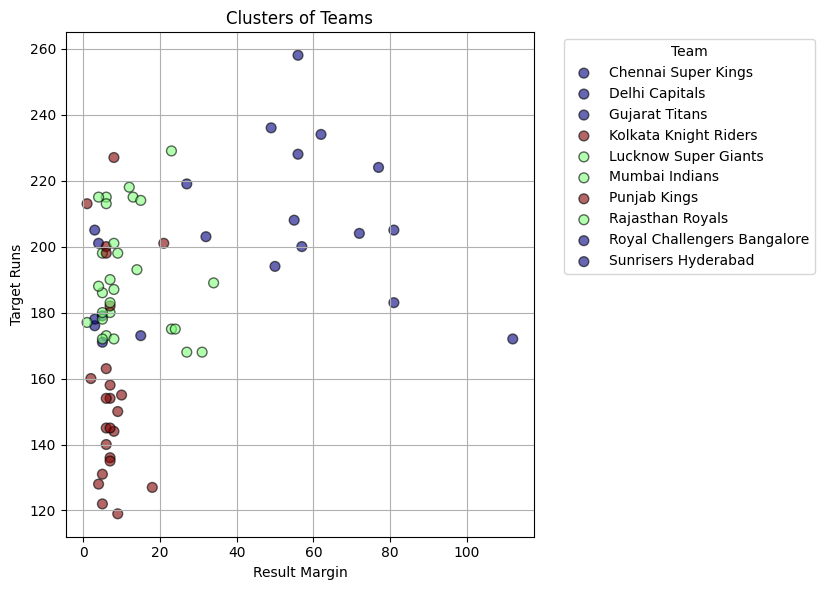

Plot saved as 'cluster_plot_2d.png'


In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Mapping of encoded team values to team names
team_names = {
    0: 'Chennai Super Kings',
    1: 'Delhi Capitals',
    2: 'Gujarat Titans',
    3: 'Kolkata Knight Riders',
    4: 'Lucknow Super Giants',
    5: 'Mumbai Indians',
    6: 'Punjab Kings',
    7: 'Rajasthan Royals',
    8: 'Royal Challengers Bangalore',
    9: 'Sunrisers Hyderabad'
}

# Assuming you have the DataFrame selected_ipl_2023

# Extracting the features for clustering
features = ['result_margin', 'target_runs']
X = selected_ipl_2023[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing the number of clusters (you can use methods like elbow method to find optimal k)
k = 3  # Adjust as needed

# Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to DataFrame
selected_ipl_2023['cluster'] = clusters

# Plotting the clusters for each team in 2D
plt.figure(figsize=(10, 6))

# Define colors for each cluster
colors = ['red', 'green', 'blue']

for team, data in selected_ipl_2023.groupby('lost_team'):
    plt.scatter(data['result_margin'], data['target_runs'], label=team_names[team], c=data['cluster'], cmap='jet', edgecolor='k', s=50, alpha=0.6)

plt.title('Clusters of Teams')
plt.xlabel('Result Margin')
plt.ylabel('Target Runs')
plt.grid(True)

# Move legend outside of the plot
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the plot area to make space for the legend

# Save the plot as a file
plt.savefig('cluster_plot_2d.png')

# Show the plot
plt.show()

# Provide feedback to the user
print("Plot saved as 'cluster_plot_2d.png'")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


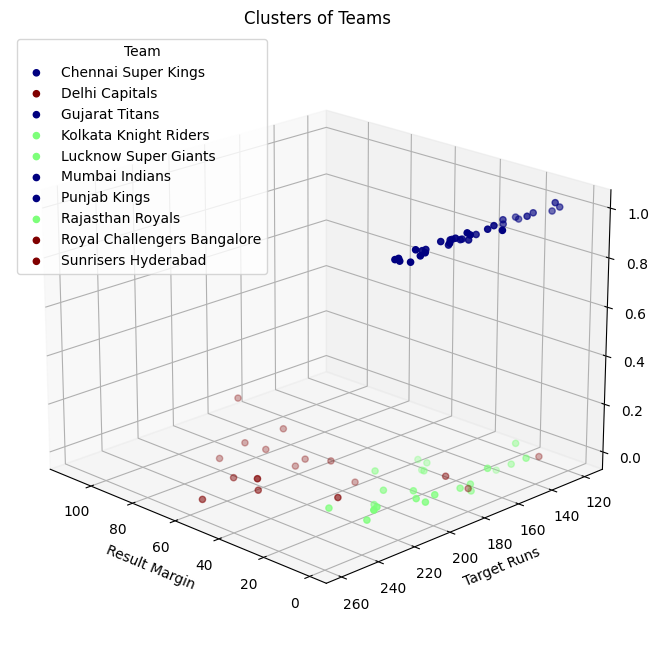

Plot saved as 'cluster_plot.png'


In [200]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have the DataFrame selected_ipl_2023

# Mapping of encoded team values to team names
team_names = {
    0: 'Chennai Super Kings',
    1: 'Delhi Capitals',
    2: 'Gujarat Titans',
    3: 'Kolkata Knight Riders',
    4: 'Lucknow Super Giants',
    5: 'Mumbai Indians',
    6: 'Punjab Kings',
    7: 'Rajasthan Royals',
    8: 'Royal Challengers Bangalore',
    9: 'Sunrisers Hyderabad'
}

# Extracting the features for clustering
features = ['result_margin', 'target_runs', 'result']
X = selected_ipl_2023[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing the number of clusters (you can use methods like elbow method to find optimal k)
k = 3  # Adjust as needed

# Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to DataFrame
selected_ipl_2023['cluster'] = clusters

# Replace the encoded team values with their names for the plot
selected_ipl_2023['lost_team'] = selected_ipl_2023['lost_team'].map(team_names)

# Plotting the clusters for each team in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot with team names as labels
for team, data in selected_ipl_2023.groupby('lost_team'):
    scatter = ax.scatter(data['result_margin'], data['target_runs'], data['result'], label=team, c=data['cluster'], cmap='jet')

ax.set_title('Clusters of Teams')
ax.set_xlabel('Result Margin')
ax.set_ylabel('Target Runs')
# Adjusting Z-axis label position
ax.set_zlabel('Result', labelpad=20)  # Increase the labelpad value as needed


# Adjusting viewing angle
ax.view_init(elev=20, azim=135)

# Adding grid lines
ax.grid(True)

# Adjust the legend to show team names
ax.legend(title='Team')

# Show the plot
plt.show()

# Save the plot as a file
fig.savefig('/content/cluster_plot.png')

# Provide feedback to the user
print("Plot saved as 'cluster_plot.png'")
